In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for teaching
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("🔬 TEACHING NON-LINEAR MODELS: A STEP-BY-STEP APPROACH")
print("=" * 70)

🔬 TEACHING NON-LINEAR MODELS: A STEP-BY-STEP APPROACH


📊 STEP 1: Generating Educational Data
--------------------------------------------------
✅ Generated 200 data points
✅ Training samples: 140
✅ Test samples: 60
✅ Data represents a typical growth phenomenon with S-shaped curve


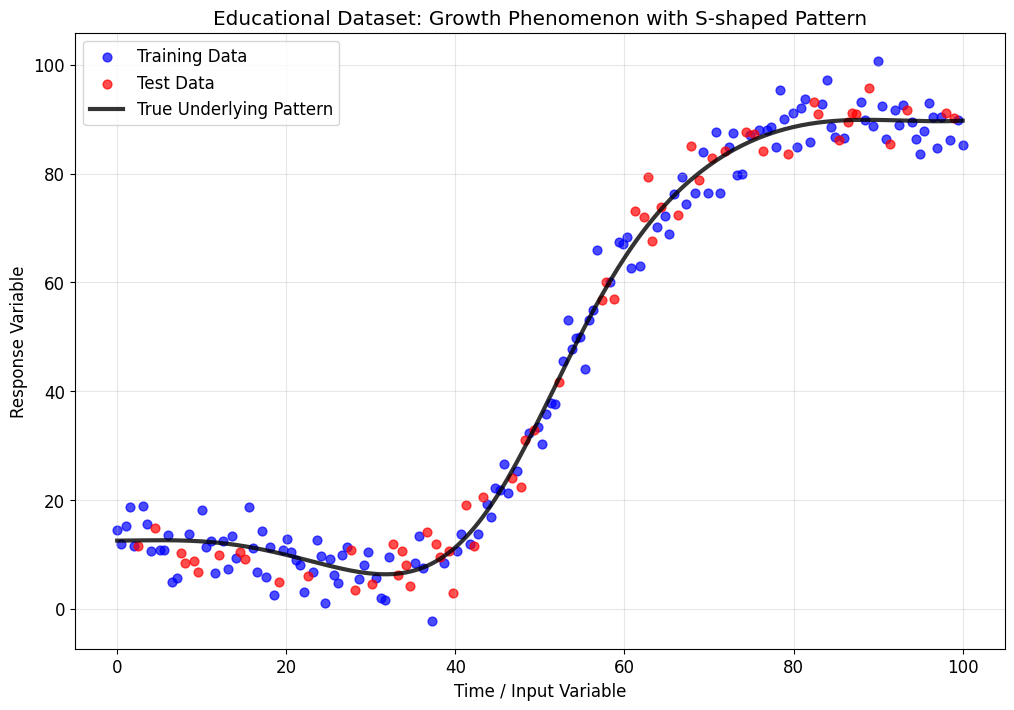


📈 OBSERVATION: The data shows clear non-linear behavior:
   • S-shaped growth pattern (logistic curve)
   • Initial slow growth, then rapid increase, followed by saturation
   • This pattern is common in biology, economics, and learning processes


In [41]:
# STEP 1: Generate educational data that clearly shows limitations of linear models
print("📊 STEP 1: Generating Educational Data")
print("-" * 50)

def generate_educational_data(n_samples=200):
    np.random.seed(42)
    x = np.linspace(0, 100, n_samples)

    # Create data with clear non-linear growth pattern
    # This mimics real-world phenomena like bacterial growth, learning curves, etc.
    true_function = (
        80 / (1 + np.exp(-0.15 * (x - 50))) +  # Logistic growth (main pattern)
        5 * np.sin(0.1 * x) +                  # Small oscillations
        0.005 * (x - 50)**2                    # Minor quadratic trend
    )

    # Add realistic noise
    noise = np.random.normal(0, 4, n_samples)
    y = true_function + noise

    return x, y, true_function

# Generate and split data
x, y, true_func = generate_educational_data()
x_reshaped = x.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.3, random_state=42)
x_train, x_test = X_train.flatten(), X_test.flatten()
x_plot = np.linspace(0, 100, 500)

print(f"✅ Generated {len(x)} data points")
print(f"✅ Training samples: {len(x_train)}")
print(f"✅ Test samples: {len(x_test)}")
print("✅ Data represents a typical growth phenomenon with S-shaped curve")

# Plot the educational data
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, alpha=0.7, label='Training Data', color='blue', s=40)
plt.scatter(x_test, y_test, alpha=0.7, label='Test Data', color='red', s=40)
plt.plot(x, true_func, 'k-', linewidth=3, label='True Underlying Pattern', alpha=0.8)
plt.xlabel('Time / Input Variable')
plt.ylabel('Response Variable')
plt.title('Educational Dataset: Growth Phenomenon with S-shaped Pattern')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n📈 OBSERVATION: The data shows clear non-linear behavior:")
print("   • S-shaped growth pattern (logistic curve)")
print("   • Initial slow growth, then rapid increase, followed by saturation")
print("   • This pattern is common in biology, economics, and learning processes")


🧪 STEP 2: Simple Linear Model
--------------------------------------------------
Let's start with the simplest approach - a straight line
📊 Linear Model Performance:
   • R² Train: 0.8603
   • R² Test:  0.8396
   • RMSE Train: 13.1667
   • RMSE Test:  14.2507


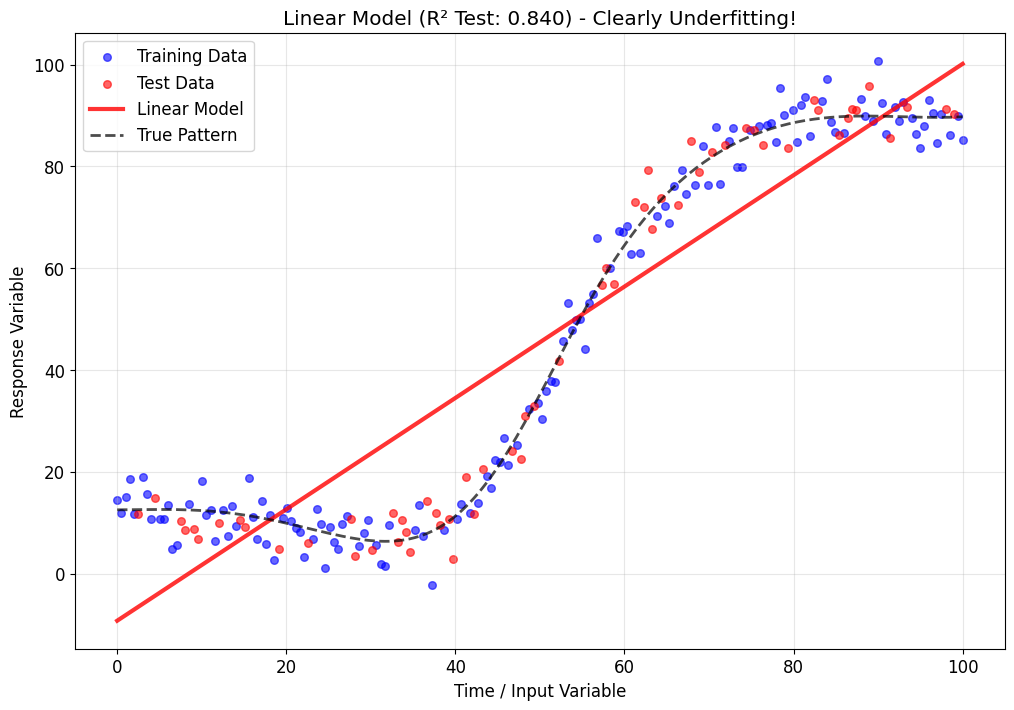


❌ PROBLEMS WITH LINEAR MODEL:
   • Cannot capture the S-shaped curve
   • Underestimates at beginning and end
   • Overestimates during growth phase
   • Poor R² value indicates inadequate fit


In [42]:
# STEP 2: Start with Simple Linear Model
print("\n🧪 STEP 2: Simple Linear Model")
print("-" * 50)
print("Let's start with the simplest approach - a straight line")

# Fit linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_train_linear = linear_model.predict(X_train)
y_test_linear = linear_model.predict(X_test)
y_plot_linear = linear_model.predict(x_plot.reshape(-1, 1))

# Calculate metrics
r2_train_linear = r2_score(y_train, y_train_linear)
r2_test_linear = r2_score(y_test, y_test_linear)
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_linear))

print(f"📊 Linear Model Performance:")
print(f"   • R² Train: {r2_train_linear:.4f}")
print(f"   • R² Test:  {r2_test_linear:.4f}")
print(f"   • RMSE Train: {rmse_train_linear:.4f}")
print(f"   • RMSE Test:  {rmse_test_linear:.4f}")

# Plot linear model
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, alpha=0.6, label='Training Data', color='blue', s=30)
plt.scatter(x_test, y_test, alpha=0.6, label='Test Data', color='red', s=30)
plt.plot(x_plot, y_plot_linear, 'r-', linewidth=3, label='Linear Model', alpha=0.8)
plt.plot(x, true_func, 'k--', linewidth=2, label='True Pattern', alpha=0.7)
plt.xlabel('Time / Input Variable')
plt.ylabel('Response Variable')
plt.title(f'Linear Model (R² Test: {r2_test_linear:.3f}) - Clearly Underfitting!')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n❌ PROBLEMS WITH LINEAR MODEL:")
print("   • Cannot capture the S-shaped curve")
print("   • Underestimates at beginning and end")
print("   • Overestimates during growth phase")
print("   • Poor R² value indicates inadequate fit")


📈 STEP 3: Polynomial Models (1st and 2nd Order)
--------------------------------------------------
When linear fails, let's try polynomials with more flexibility


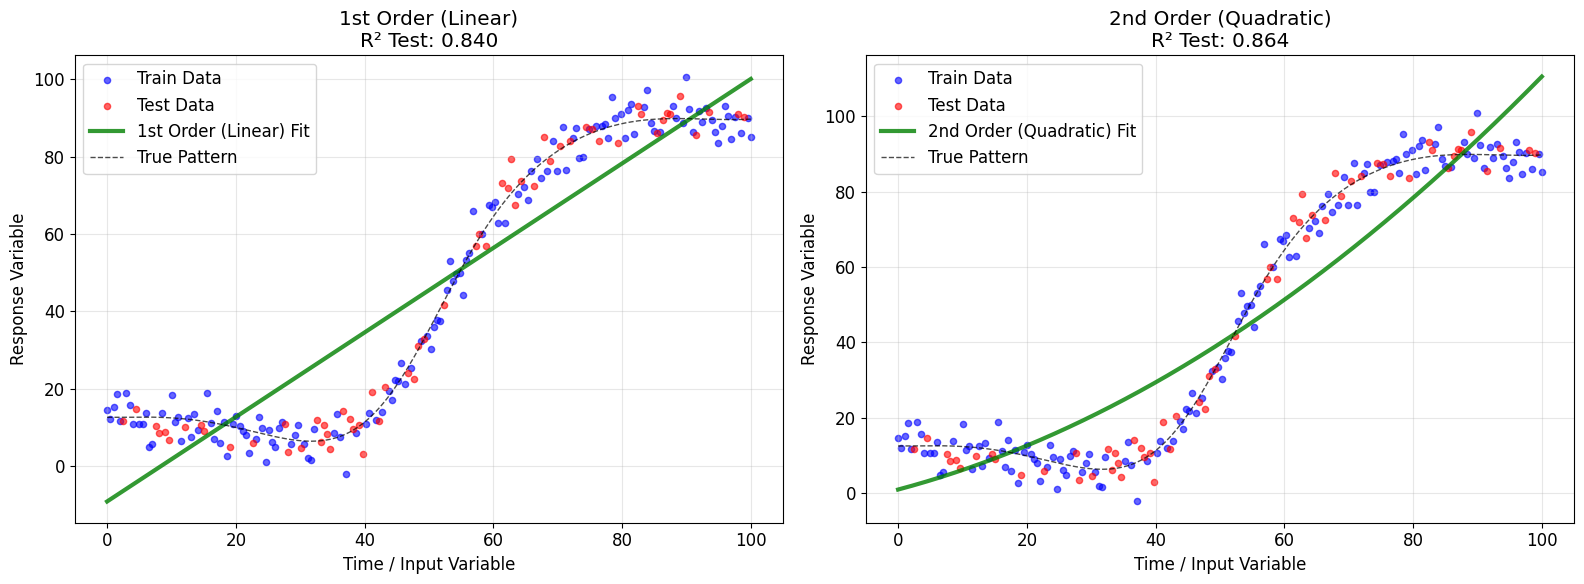


📊 Polynomial Models Comparison:
                   Model  R2_Train  R2_Test  RMSE_Train  RMSE_Test
0     1st Order (Linear)    0.8603   0.8396     13.1667    14.2507
1  2nd Order (Quadratic)    0.8798   0.8636     12.2135    13.1439

🔍 ANALYSIS OF POLYNOMIAL MODELS:
   1st Order (Linear):
   • Still cannot capture S-shape
   • Only straight line approximation
   • Significant underfitting

   2nd Order (Quadratic):
   • Can capture curvature but only U-shaped
   • Cannot model the saturation phase
   • Still inadequate for our growth data


In [43]:
# STEP 3: Try 1st and 2nd Order Polynomials
print("\n📈 STEP 3: Polynomial Models (1st and 2nd Order)")
print("-" * 50)
print("When linear fails, let's try polynomials with more flexibility")

# Define polynomial models
poly_models = {
    '1st Order (Linear)': 1,
    '2nd Order (Quadratic)': 2
}

poly_results = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, (name, degree) in enumerate(poly_models.items()):
    # Create and fit polynomial model
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    poly_model.fit(X_train, y_train)

    # Predictions
    y_train_pred = poly_model.predict(X_train)
    y_test_pred = poly_model.predict(X_test)
    y_plot_pred = poly_model.predict(x_plot.reshape(-1, 1))

    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    poly_results.append({
        'Model': name,
        'Degree': degree,
        'R2_Train': r2_train,
        'R2_Test': r2_test,
        'RMSE_Train': rmse_train,
        'RMSE_Test': rmse_test
    })

    # Plot
    ax = ax1 if i == 0 else ax2
    ax.scatter(x_train, y_train, alpha=0.6, color='blue', s=20, label='Train Data')
    ax.scatter(x_test, y_test, alpha=0.6, color='red', s=20, label='Test Data')
    ax.plot(x_plot, y_plot_pred, 'g-', linewidth=3, label=f'{name} Fit', alpha=0.8)
    ax.plot(x, true_func, 'k--', linewidth=1, label='True Pattern', alpha=0.7)
    ax.set_title(f'{name}\nR² Test: {r2_test:.3f}')
    ax.set_xlabel('Time / Input Variable')
    ax.set_ylabel('Response Variable')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display results
poly_df = pd.DataFrame(poly_results)
print("\n📊 Polynomial Models Comparison:")
print(poly_df[['Model', 'R2_Train', 'R2_Test', 'RMSE_Train', 'RMSE_Test']].round(4))

print("\n🔍 ANALYSIS OF POLYNOMIAL MODELS:")
print("   1st Order (Linear):")
print("   • Still cannot capture S-shape")
print("   • Only straight line approximation")
print("   • Significant underfitting")
print("\n   2nd Order (Quadratic):")
print("   • Can capture curvature but only U-shaped")
print("   • Cannot model the saturation phase")
print("   • Still inadequate for our growth data")


🚀 STEP 4: Higher Order Polynomials - The Overfitting Problem
--------------------------------------------------
Let's try even more complex polynomials...


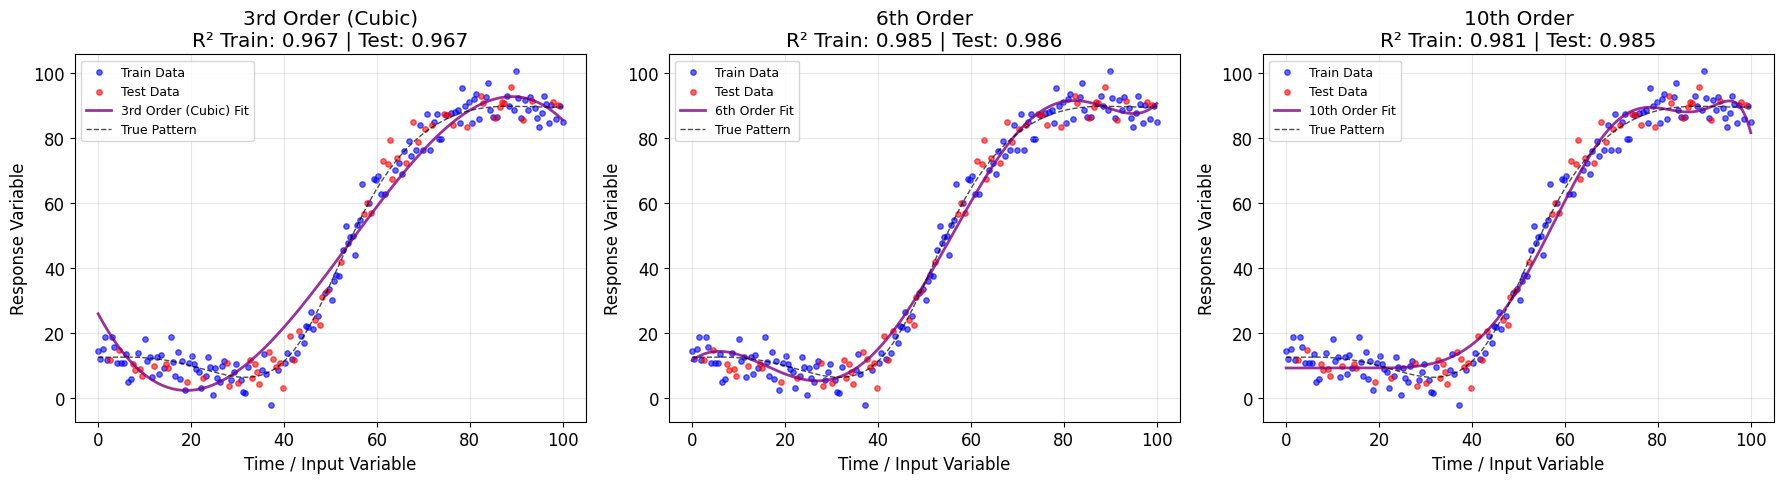


📊 Higher Order Polynomials Performance:


,Model,Degree,R2_Train,R2_Test,R2_Diff
0,3rd Order (Cubic),3,0.9668,0.9671,-0.0004
1,6th Order,6,0.9848,0.9859,-0.0011
2,10th Order,10,0.9812,0.9852,-0.0040



⚠️  CRITICAL OBSERVATIONS:
   • Cubic (3rd order): Better but still can't capture saturation well
   • 6th order: Starts to overfit - wiggly curve, poor generalization
   • 10th order: Severe overfitting! Fits noise, not pattern
   • Large gap between train and test R² indicates overfitting
   • Polynomials are trying to approximate S-shape with many bends


In [44]:
# STEP 4: Show Higher Order Polynomials and Their Limitations
print("\n🚀 STEP 4: Higher Order Polynomials - The Overfitting Problem")
print("-" * 50)
print("Let's try even more complex polynomials...")

higher_poly_models = {
    '3rd Order (Cubic)': 3,
    '6th Order': 6,
    '10th Order': 10
}

higher_poly_results = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, degree) in enumerate(higher_poly_models.items()):
    # Create and fit polynomial model
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    poly_model.fit(X_train, y_train)

    # Predictions
    y_train_pred = poly_model.predict(X_train)
    y_test_pred = poly_model.predict(X_test)
    y_plot_pred = poly_model.predict(x_plot.reshape(-1, 1))

    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    higher_poly_results.append({
        'Model': name,
        'Degree': degree,
        'R2_Train': r2_train,
        'R2_Test': r2_test,
        'RMSE_Train': rmse_train,
        'RMSE_Test': rmse_test,
        'R2_Diff': r2_train - r2_test
    })

    # Plot
    ax = axes[i]
    ax.scatter(x_train, y_train, alpha=0.6, color='blue', s=15, label='Train Data')
    ax.scatter(x_test, y_test, alpha=0.6, color='red', s=15, label='Test Data')
    ax.plot(x_plot, y_plot_pred, 'purple', linewidth=2, label=f'{name} Fit', alpha=0.8)
    ax.plot(x, true_func, 'k--', linewidth=1, label='True Pattern', alpha=0.7)
    ax.set_title(f'{name}\nR² Train: {r2_train:.3f} | Test: {r2_test:.3f}')
    ax.set_xlabel('Time / Input Variable')
    ax.set_ylabel('Response Variable')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display results
higher_poly_df = pd.DataFrame(higher_poly_results)
print("\n📊 Higher Order Polynomials Performance:")
display(higher_poly_df[['Model', 'Degree', 'R2_Train', 'R2_Test', 'R2_Diff']].round(4))

print("\n⚠️  CRITICAL OBSERVATIONS:")
print("   • Cubic (3rd order): Better but still can't capture saturation well")
print("   • 6th order: Starts to overfit - wiggly curve, poor generalization")
print("   • 10th order: Severe overfitting! Fits noise, not pattern")
print("   • Large gap between train and test R² indicates overfitting")
print("   • Polynomials are trying to approximate S-shape with many bends")


🎯 STEP 5: Introducing Non-Linear Models
--------------------------------------------------
Since polynomials fail, let's use models designed for growth patterns!
🔧 Fitting Non-Linear Growth Models...
These models are specifically designed for growth phenomena!
✅ Logistic Growth | R² Test: 0.9777 | S-shaped growth with saturation
✅ Gompertz Growth | R² Test: 0.9714 | Asymmetric S-shaped growth
✅ Richards Growth | R² Test: 0.9765 | Flexible S-shaped growth


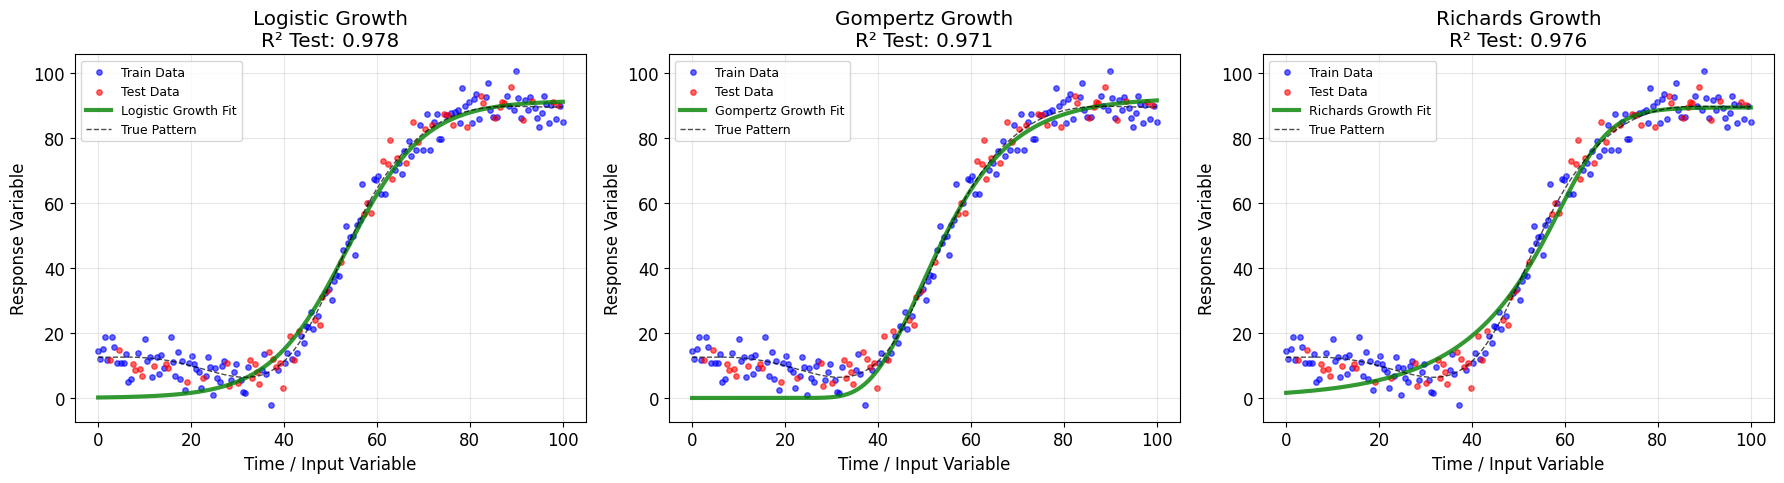


🎉 BREAKTHROUGH! Non-linear models successfully capture the pattern!


In [45]:
# STEP 5: Introduce Non-Linear Models - The Right Tool for the Job
print("\n🎯 STEP 5: Introducing Non-Linear Models")
print("-" * 50)
print("Since polynomials fail, let's use models designed for growth patterns!")

# Define key non-linear growth models
def logistic(x, a, b, c):
    """Logistic growth model: a / (1 + exp(-b*(x-c)))"""
    return a / (1 + np.exp(-b * (x - c)))

def gompertz(x, a, b, c):
    """Gompertz growth model: a * exp(-exp(-b*(x-c)))"""
    return a * np.exp(-np.exp(-b * (x - c)))

def richards(x, a, b, c, d):
    """Richards growth model: a / (1 + exp(-b*(x-c)))^(1/d)"""
    return a / (1 + np.exp(-b * (x - c)))**(1/d)

# Selected non-linear models for teaching
nonlinear_models = [
    ("Logistic Growth", logistic, [80, 0.15, 50], "S-shaped growth with saturation"),
    ("Gompertz Growth", gompertz, [80, 0.1, 50], "Asymmetric S-shaped growth"),
    ("Richards Growth", richards, [80, 0.15, 50, 1.5], "Flexible S-shaped growth")
]

nonlinear_results = []

print("🔧 Fitting Non-Linear Growth Models...")
print("These models are specifically designed for growth phenomena!")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, func, p0, description) in enumerate(nonlinear_models):
    try:
        # Fit non-linear model
        popt, pcov = curve_fit(func, x_train, y_train, p0=p0, maxfev=5000)

        # Predictions
        y_train_pred = func(x_train, *popt)
        y_test_pred = func(x_test, *popt)
        y_plot_pred = func(x_plot, *popt)

        # Calculate metrics
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        nonlinear_results.append({
            'Model': name,
            'R2_Train': r2_train,
            'R2_Test': r2_test,
            'RMSE_Train': rmse_train,
            'RMSE_Test': rmse_test,
            'Parameters': popt,
            'Description': description
        })

        # Plot
        ax = axes[i]
        ax.scatter(x_train, y_train, alpha=0.6, color='blue', s=15, label='Train Data')
        ax.scatter(x_test, y_test, alpha=0.6, color='red', s=15, label='Test Data')
        ax.plot(x_plot, y_plot_pred, 'green', linewidth=3, label=f'{name} Fit', alpha=0.8)
        ax.plot(x, true_func, 'k--', linewidth=1, label='True Pattern', alpha=0.7)
        ax.set_title(f'{name}\nR² Test: {r2_test:.3f}')
        ax.set_xlabel('Time / Input Variable')
        ax.set_ylabel('Response Variable')
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.3)

        print(f"✅ {name:15} | R² Test: {r2_test:.4f} | {description}")

    except Exception as e:
        print(f"❌ {name:15} | Failed: {str(e)}")
        nonlinear_results.append({
            'Model': name,
            'R2_Train': np.nan,
            'R2_Test': np.nan,
            'RMSE_Train': np.nan,
            'RMSE_Test': np.nan,
            'Parameters': None,
            'Description': description
        })

plt.tight_layout()
plt.show()

nonlinear_df = pd.DataFrame(nonlinear_results)
print("\n🎉 BREAKTHROUGH! Non-linear models successfully capture the pattern!")


📊 STEP 6: Comprehensive Model Comparison
--------------------------------------------------
Let's compare all approaches side by side


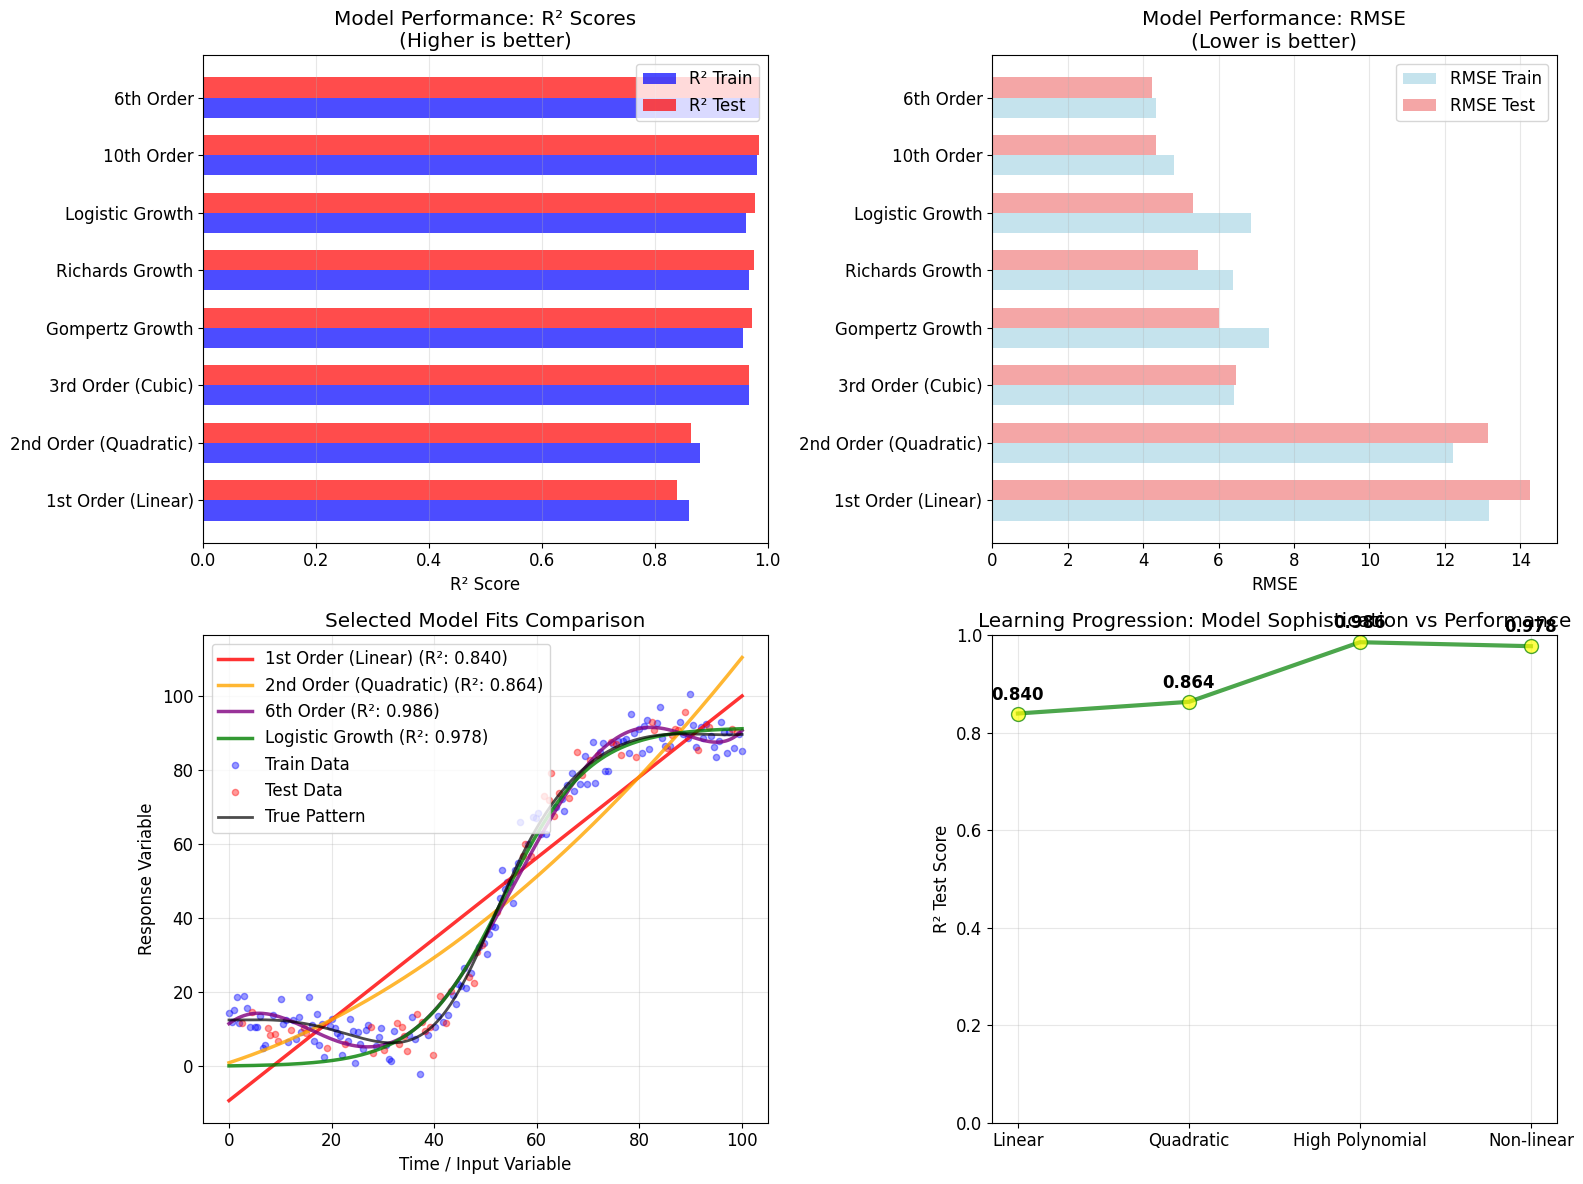


📚 TEACHING SUMMARY

🎯 KEY LEARNING POINTS:
1. LINEAR MODELS: Simple but inadequate for complex patterns
2. POLYNOMIALS: More flexible but:
   • Low orders: Underfit complex shapes
   • High orders: Overfit and capture noise
3. NON-LINEAR MODELS: Right tool for specific patterns
   • Designed for particular phenomena (growth, decay, etc.)
   • Better generalization with fewer parameters
   • Interpretable parameters with real-world meaning

🏆 BEST PERFORMING MODEL: Logistic Growth (R² Test: 0.9777)
   • Naturally captures S-shaped growth
   • Excellent generalization
   • Parameters have biological/economic interpretation

💡 TAKEAWAY FOR STUDENTS:
Choose your model based on:
• The underlying phenomenon you're modeling
• The shape of your data
• The trade-off between complexity and generalization
• Interpretability of parameters


In [46]:
# STEP 6: Comprehensive Comparison - The Big Picture
print("\n📊 STEP 6: Comprehensive Model Comparison")
print("-" * 50)
print("Let's compare all approaches side by side")

# Combine all results
all_results = []

# Add linear and polynomials
all_results.extend(poly_results)
all_results.extend(higher_poly_results)

# Add non-linear models
for result in nonlinear_results:
    if not pd.isna(result['R2_Train']):
        all_results.append(result)

# Create comparison dataframe
comparison_df = pd.DataFrame(all_results)

# Create comprehensive comparison plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: R² comparison
models_ordered = comparison_df.sort_values('R2_Test')['Model'].values
r2_test_ordered = comparison_df.sort_values('R2_Test')['R2_Test'].values
r2_train_ordered = comparison_df.sort_values('R2_Test')['R2_Train'].values

y_pos = np.arange(len(models_ordered))
bar_width = 0.35

ax1.barh(y_pos - bar_width/2, r2_train_ordered, bar_width,
         label='R² Train', alpha=0.7, color='blue')
ax1.barh(y_pos + bar_width/2, r2_test_ordered, bar_width,
         label='R² Test', alpha=0.7, color='red')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(models_ordered)
ax1.set_xlabel('R² Score')
ax1.set_title('Model Performance: R² Scores\n(Higher is better)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')
ax1.set_xlim(0, 1)

# Plot 2: RMSE comparison
rmse_test_ordered = comparison_df.sort_values('R2_Test')['RMSE_Test'].values
rmse_train_ordered = comparison_df.sort_values('R2_Test')['RMSE_Train'].values

ax2.barh(y_pos - bar_width/2, rmse_train_ordered, bar_width,
         label='RMSE Train', alpha=0.7, color='lightblue')
ax2.barh(y_pos + bar_width/2, rmse_test_ordered, bar_width,
         label='RMSE Test', alpha=0.7, color='lightcoral')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(models_ordered)
ax2.set_xlabel('RMSE')
ax2.set_title('Model Performance: RMSE\n(Lower is better)')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='x')

# Plot 3: Model fits comparison (selected models)
selected_models = ['1st Order (Linear)', '2nd Order (Quadratic)', '6th Order', 'Logistic Growth']
colors = ['red', 'orange', 'purple', 'green']

for i, model_name in enumerate(selected_models):
    model_data = comparison_df[comparison_df['Model'] == model_name].iloc[0]

    if 'Order' in model_name:
        # Polynomial model
        degree = int(model_name.split(' ')[0][0]) if model_name != '2nd Order (Quadratic)' else 2
        poly_model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])
        poly_model.fit(X_train, y_train)
        y_plot_pred = poly_model.predict(x_plot.reshape(-1, 1))
    else:
        # Non-linear model
        func = None
        for nl_name, nl_func, p0, desc in nonlinear_models:
            if nl_name == model_name:
                func = nl_func
                break
        if func:
            popt = model_data['Parameters']
            y_plot_pred = func(x_plot, *popt)

    ax3.plot(x_plot, y_plot_pred, color=colors[i], linewidth=2.5,
             label=f"{model_name} (R²: {model_data['R2_Test']:.3f})", alpha=0.8)

ax3.scatter(x_train, y_train, alpha=0.4, color='blue', s=20, label='Train Data')
ax3.scatter(x_test, y_test, alpha=0.4, color='red', s=20, label='Test Data')
ax3.plot(x, true_func, 'k-', linewidth=2, label='True Pattern', alpha=0.7)
ax3.set_xlabel('Time / Input Variable')
ax3.set_ylabel('Response Variable')
ax3.set_title('Selected Model Fits Comparison')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Learning progression
models_progression = ['Linear', 'Quadratic', 'High Polynomial', 'Non-linear']
performance = [r2_test_linear,
               comparison_df[comparison_df['Model'] == '2nd Order (Quadratic)']['R2_Test'].iloc[0],
               comparison_df[comparison_df['Model'] == '6th Order']['R2_Test'].iloc[0],
               comparison_df[comparison_df['Model'] == 'Logistic Growth']['R2_Test'].iloc[0]]

ax4.plot(models_progression, performance, 'o-', linewidth=3, markersize=10,
         color='green', alpha=0.7, markerfacecolor='yellow')
ax4.set_ylabel('R² Test Score')
ax4.set_title('Learning Progression: Model Sophistication vs Performance')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)

# Add value annotations
for i, (model, perf) in enumerate(zip(models_progression, performance)):
    ax4.annotate(f'{perf:.3f}', (i, perf), xytext=(0, 10),
                textcoords='offset points', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("📚 TEACHING SUMMARY")
print("="*70)

print("\n🎯 KEY LEARNING POINTS:")
print("1. LINEAR MODELS: Simple but inadequate for complex patterns")
print("2. POLYNOMIALS: More flexible but:")
print("   • Low orders: Underfit complex shapes")
print("   • High orders: Overfit and capture noise")
print("3. NON-LINEAR MODELS: Right tool for specific patterns")
print("   • Designed for particular phenomena (growth, decay, etc.)")
print("   • Better generalization with fewer parameters")
print("   • Interpretable parameters with real-world meaning")

print(f"\n🏆 BEST PERFORMING MODEL: Logistic Growth (R² Test: {nonlinear_df['R2_Test'].max():.4f})")
print("   • Naturally captures S-shaped growth")
print("   • Excellent generalization")
print("   • Parameters have biological/economic interpretation")

print("\n💡 TAKEAWAY FOR STUDENTS:")
print("Choose your model based on:")
print("• The underlying phenomenon you're modeling")
print("• The shape of your data")
print("• The trade-off between complexity and generalization")
print("• Interpretability of parameters")


🔍 STEP 7: Understanding the Logistic Growth Model
--------------------------------------------------
Let's examine why the logistic model works so well
📐 Logistic Model Parameters:
   • a (carrying capacity) = 91.61
   • b (growth rate) = 0.1205
   • c (inflection point) = 53.57

📖 Parameter Interpretation:
   • Carrying capacity (a): Maximum possible value = 91.6
   • Growth rate (b): How fast growth occurs = 0.1205
   • Inflection point (c): Where growth is fastest at x = 53.6


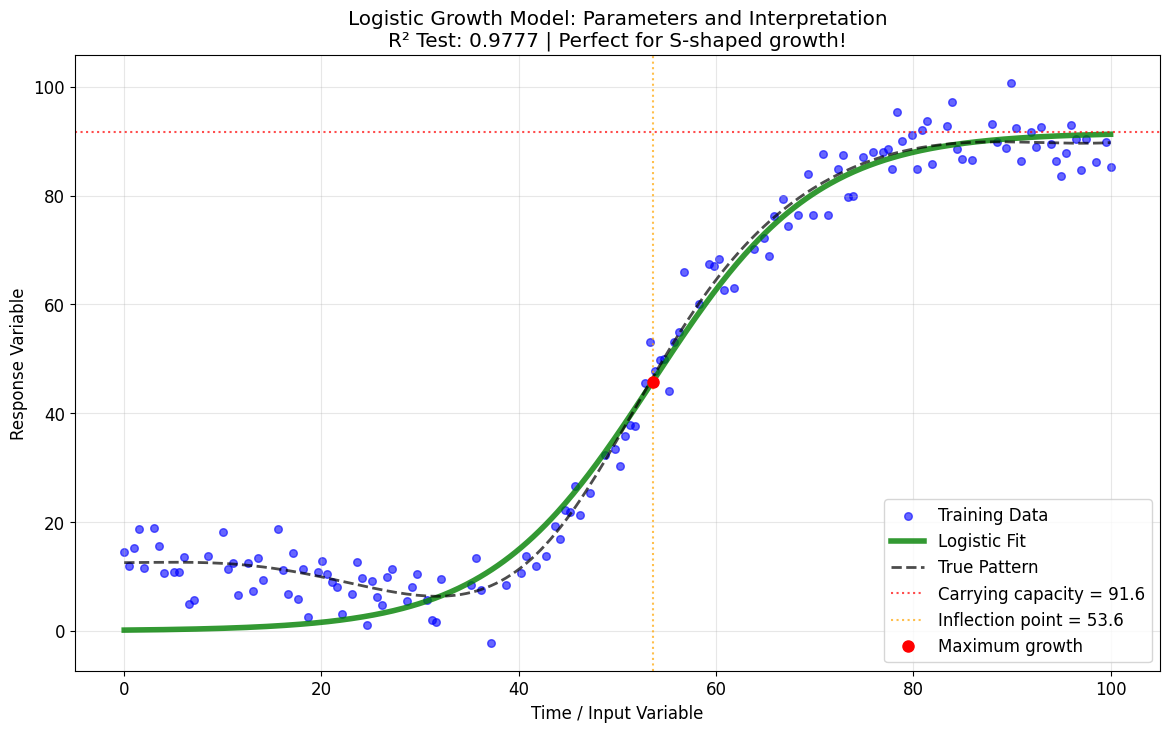


🎯 WHY LOGISTIC WORKS:
1. Matches the fundamental S-shape of growth phenomena
2. Parameters have real-world meaning
3. Naturally models saturation (carrying capacity)
4. Few parameters but high explanatory power
5. Excellent generalization to new data

🏁 CONCLUSION: Non-linear models are essential for real-world data!

When your data shows specific patterns:
• Growth/Decay → Exponential, Logistic, Gompertz
• Oscillations → Trigonometric functions
• Power laws → Power functions
• Saturation effects → Logistic, Richards

Remember: Choose models that match your domain knowledge!


In [47]:
# STEP 7: Detailed Non-Linear Model Explanation
print("\n🔍 STEP 7: Understanding the Logistic Growth Model")
print("-" * 50)
print("Let's examine why the logistic model works so well")

# Get the best logistic model
best_logistic = None
for result in nonlinear_results:
    if result['Model'] == 'Logistic Growth' and not pd.isna(result['R2_Train']):
        best_logistic = result
        break

if best_logistic:
    popt = best_logistic['Parameters']
    a, b, c = popt

    print(f"📐 Logistic Model Parameters:")
    print(f"   • a (carrying capacity) = {a:.2f}")
    print(f"   • b (growth rate) = {b:.4f}")
    print(f"   • c (inflection point) = {c:.2f}")

    print(f"\n📖 Parameter Interpretation:")
    print(f"   • Carrying capacity (a): Maximum possible value = {a:.1f}")
    print(f"   • Growth rate (b): How fast growth occurs = {b:.4f}")
    print(f"   • Inflection point (c): Where growth is fastest at x = {c:.1f}")

    # Plot with parameter annotations
    plt.figure(figsize=(14, 8))

    # Plot data and fit
    plt.scatter(x_train, y_train, alpha=0.6, color='blue', s=30, label='Training Data')
    y_plot_logistic = logistic(x_plot, *popt)
    plt.plot(x_plot, y_plot_logistic, 'green', linewidth=4, label='Logistic Fit', alpha=0.8)
    plt.plot(x, true_func, 'k--', linewidth=2, label='True Pattern', alpha=0.7)

    # Add parameter annotations
    # Carrying capacity
    plt.axhline(y=a, color='red', linestyle=':', alpha=0.7, label=f'Carrying capacity = {a:.1f}')
    # Inflection point
    plt.axvline(x=c, color='orange', linestyle=':', alpha=0.7, label=f'Inflection point = {c:.1f}')
    # Maximum growth point
    growth_y = a / 2
    plt.plot(c, growth_y, 'ro', markersize=8, label='Maximum growth')

    plt.xlabel('Time / Input Variable')
    plt.ylabel('Response Variable')
    plt.title('Logistic Growth Model: Parameters and Interpretation\n' +
              f'R² Test: {best_logistic["R2_Test"]:.4f} | Perfect for S-shaped growth!')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\n🎯 WHY LOGISTIC WORKS:")
    print("1. Matches the fundamental S-shape of growth phenomena")
    print("2. Parameters have real-world meaning")
    print("3. Naturally models saturation (carrying capacity)")
    print("4. Few parameters but high explanatory power")
    print("5. Excellent generalization to new data")

print("\n" + "="*70)
print("🏁 CONCLUSION: Non-linear models are essential for real-world data!")
print("="*70)
print("\nWhen your data shows specific patterns:")
print("• Growth/Decay → Exponential, Logistic, Gompertz")
print("• Oscillations → Trigonometric functions")
print("• Power laws → Power functions")
print("• Saturation effects → Logistic, Richards")
print("\nRemember: Choose models that match your domain knowledge!")

📊 CREATING RESIDUAL PLOTS FOR ALL MODELS
🔧 Fitting all models for residual analysis...
✅ 1. Linear                 | R² Train: 0.8603 | R² Test: 0.8396
✅ 2. Quadratic              | R² Train: 0.8798 | R² Test: 0.8636
✅ 3. Cubic                  | R² Train: 0.9668 | R² Test: 0.9671
✅ 4. 6th Order Polynomial   | R² Train: 0.9848 | R² Test: 0.9859
✅ 5. 10th Order Polynomial  | R² Train: 0.9812 | R² Test: 0.9852
✅ 6. Logistic               | R² Train: 0.9620 | R² Test: 0.9777
✅ 7. Gompertz               | R² Train: 0.9566 | R² Test: 0.9714
✅ 8. Richards               | R² Train: 0.9673 | R² Test: 0.9765
✅ 9. Exponential            | R² Train: 0.8299 | R² Test: 0.8039
✅ 10. Power Law             | R² Train: 0.8868 | R² Test: 0.8730
✅ 11. Logarithmic           | R² Train: 0.2175 | R² Test: 0.2661
✅ 12. Sine Wave             | R² Train: 0.0134 | R² Test: 0.0477

📈 CREATING INDIVIDUAL RESIDUAL PLOTS
--------------------------------------------------


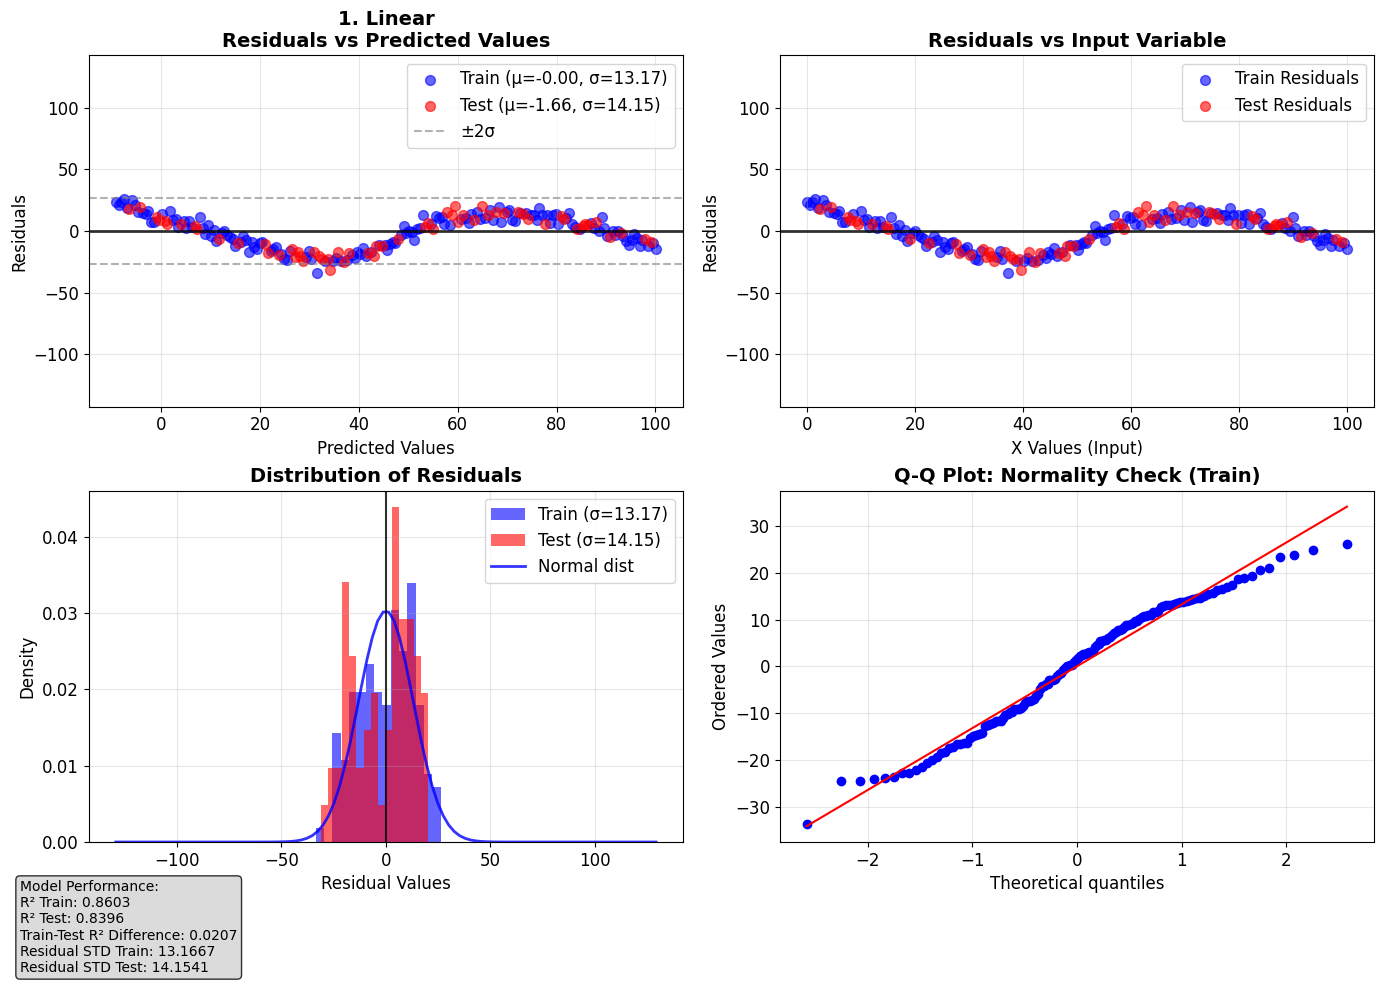


🔍 1. Linear - Residual Analysis:
   • Residual Mean (Train): -0.0000 (should be near 0)
   • Residual STD (Train): 13.1667
   • Residual Mean (Test): -1.6562 (should be near 0)
   • Residual STD (Test): 14.1541
   • % points within ±2σ (Train): 99.3%
   • % points within ±2σ (Test): 98.3%


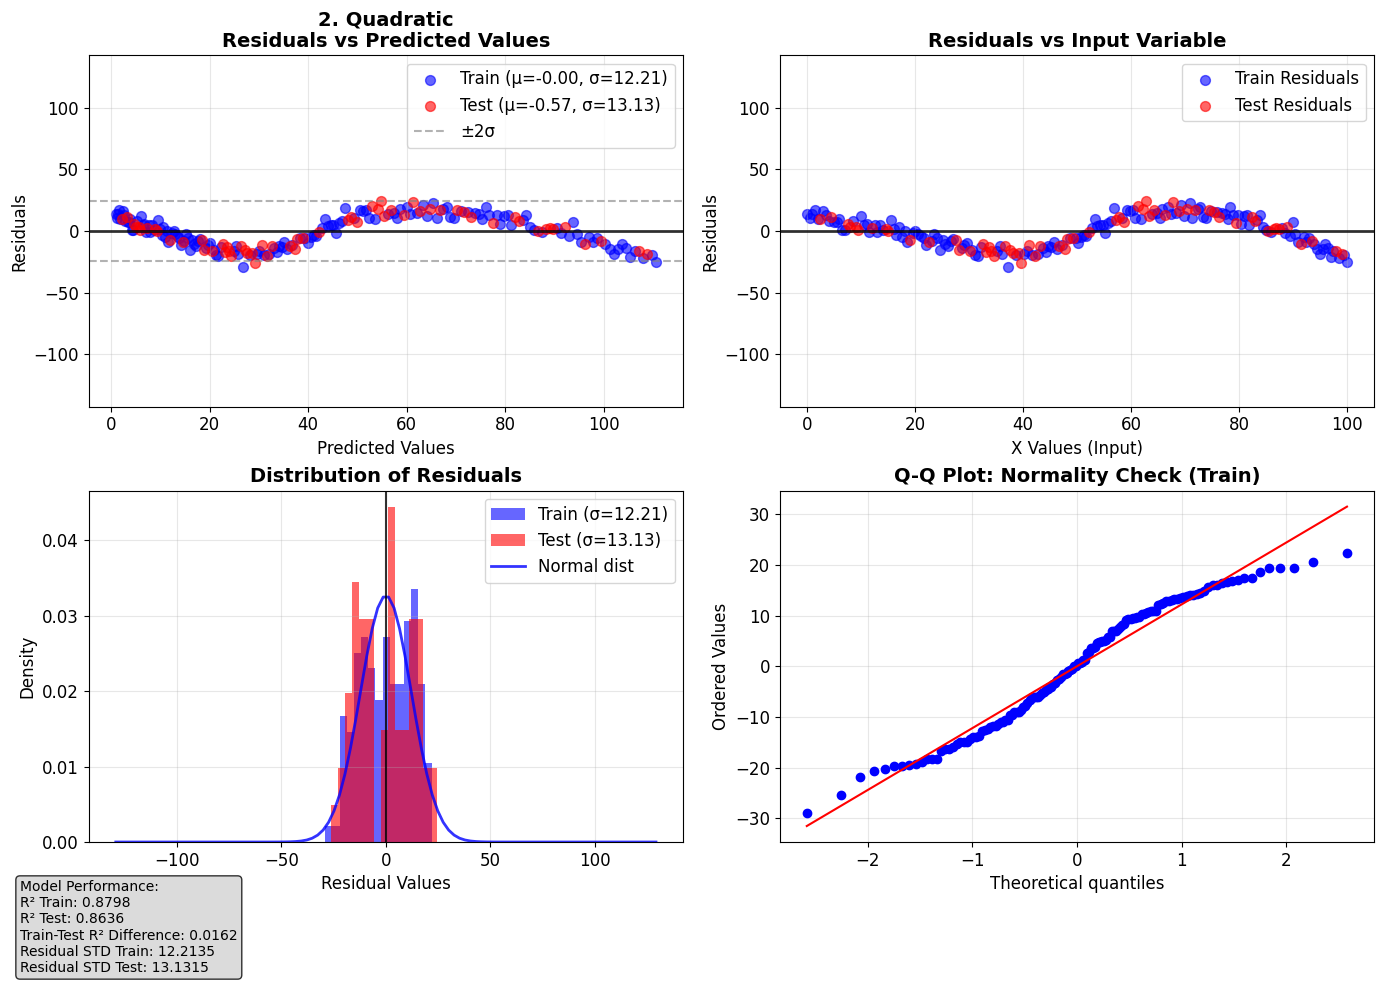


🔍 2. Quadratic - Residual Analysis:
   • Residual Mean (Train): -0.0000 (should be near 0)
   • Residual STD (Train): 12.2135
   • Residual Mean (Test): -0.5724 (should be near 0)
   • Residual STD (Test): 13.1315
   • % points within ±2σ (Train): 98.6%
   • % points within ±2σ (Test): 100.0%


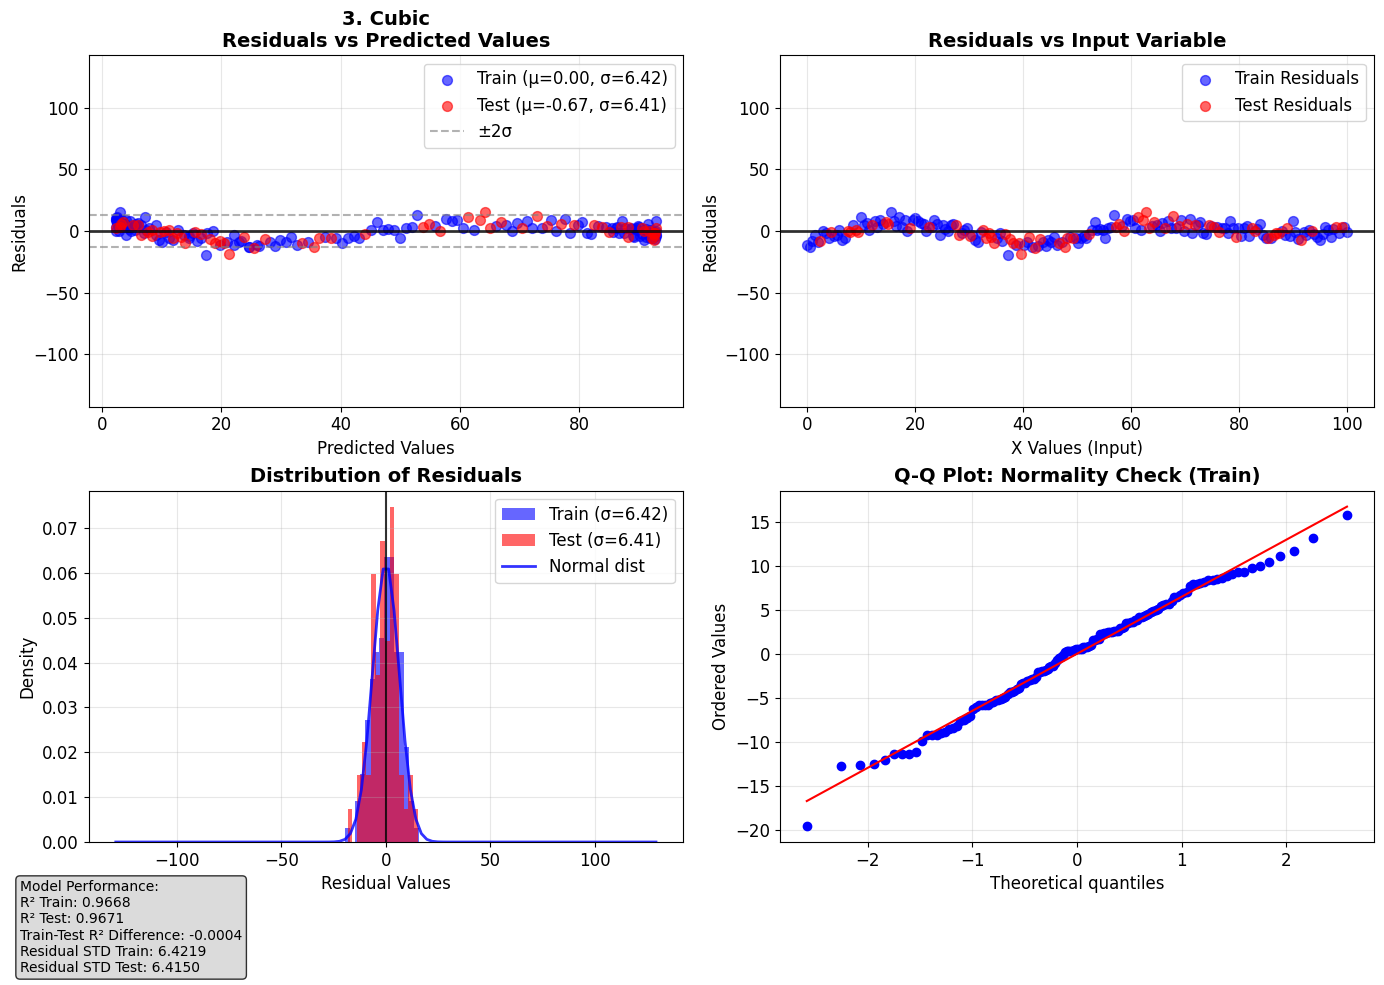


🔍 3. Cubic - Residual Analysis:
   • Residual Mean (Train): 0.0000 (should be near 0)
   • Residual STD (Train): 6.4219
   • Residual Mean (Test): -0.6679 (should be near 0)
   • Residual STD (Test): 6.4150
   • % points within ±2σ (Train): 97.9%
   • % points within ±2σ (Test): 93.3%


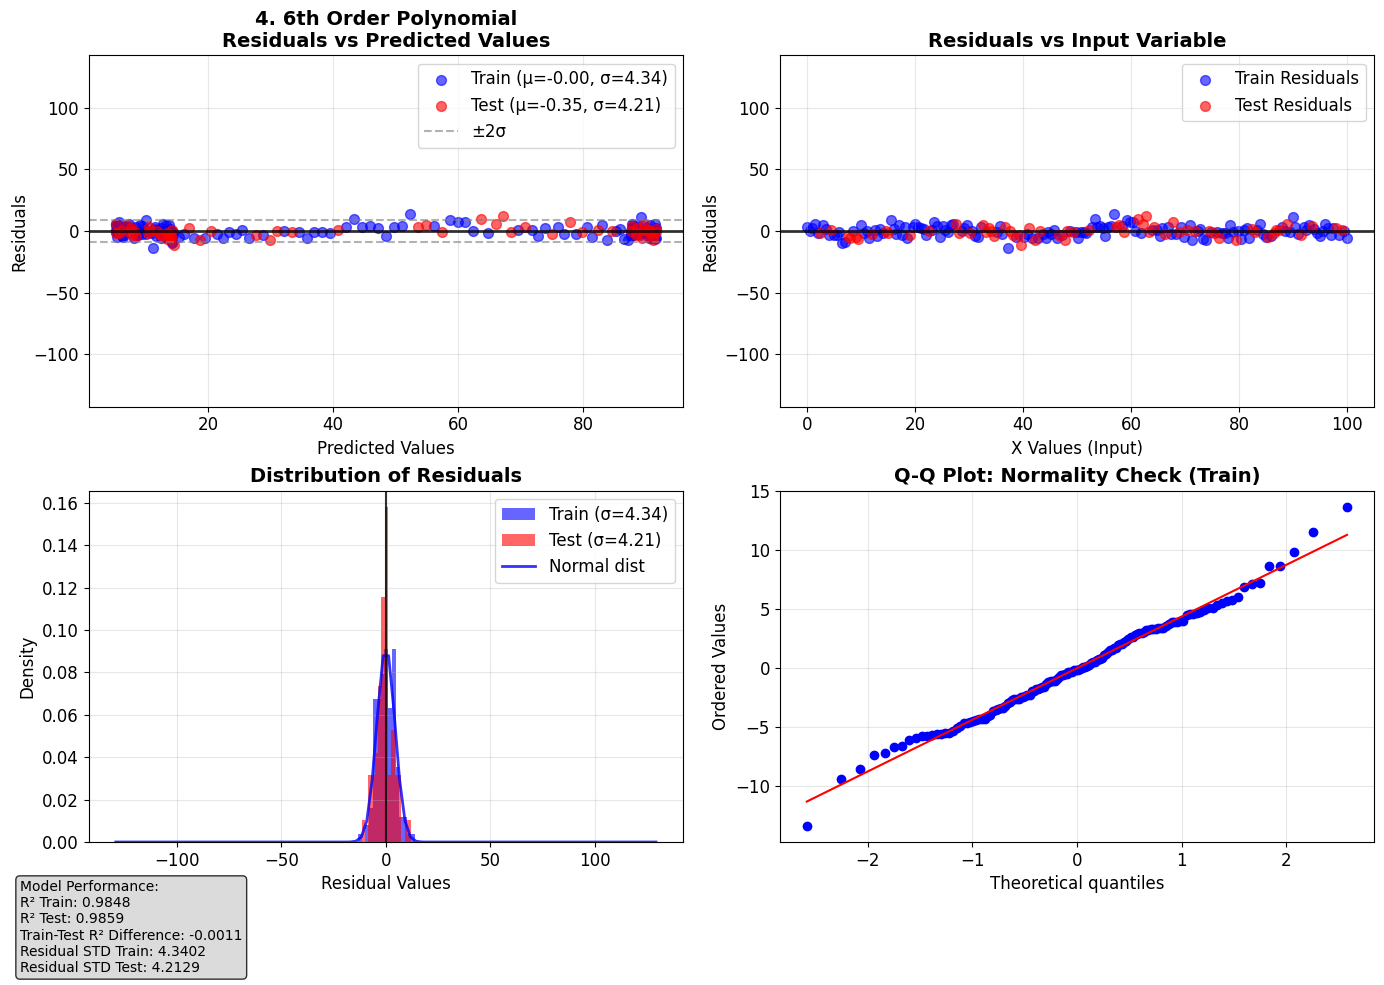


🔍 4. 6th Order Polynomial - Residual Analysis:
   • Residual Mean (Train): -0.0000 (should be near 0)
   • Residual STD (Train): 4.3402
   • Residual Mean (Test): -0.3504 (should be near 0)
   • Residual STD (Test): 4.2129
   • % points within ±2σ (Train): 95.0%
   • % points within ±2σ (Test): 95.0%


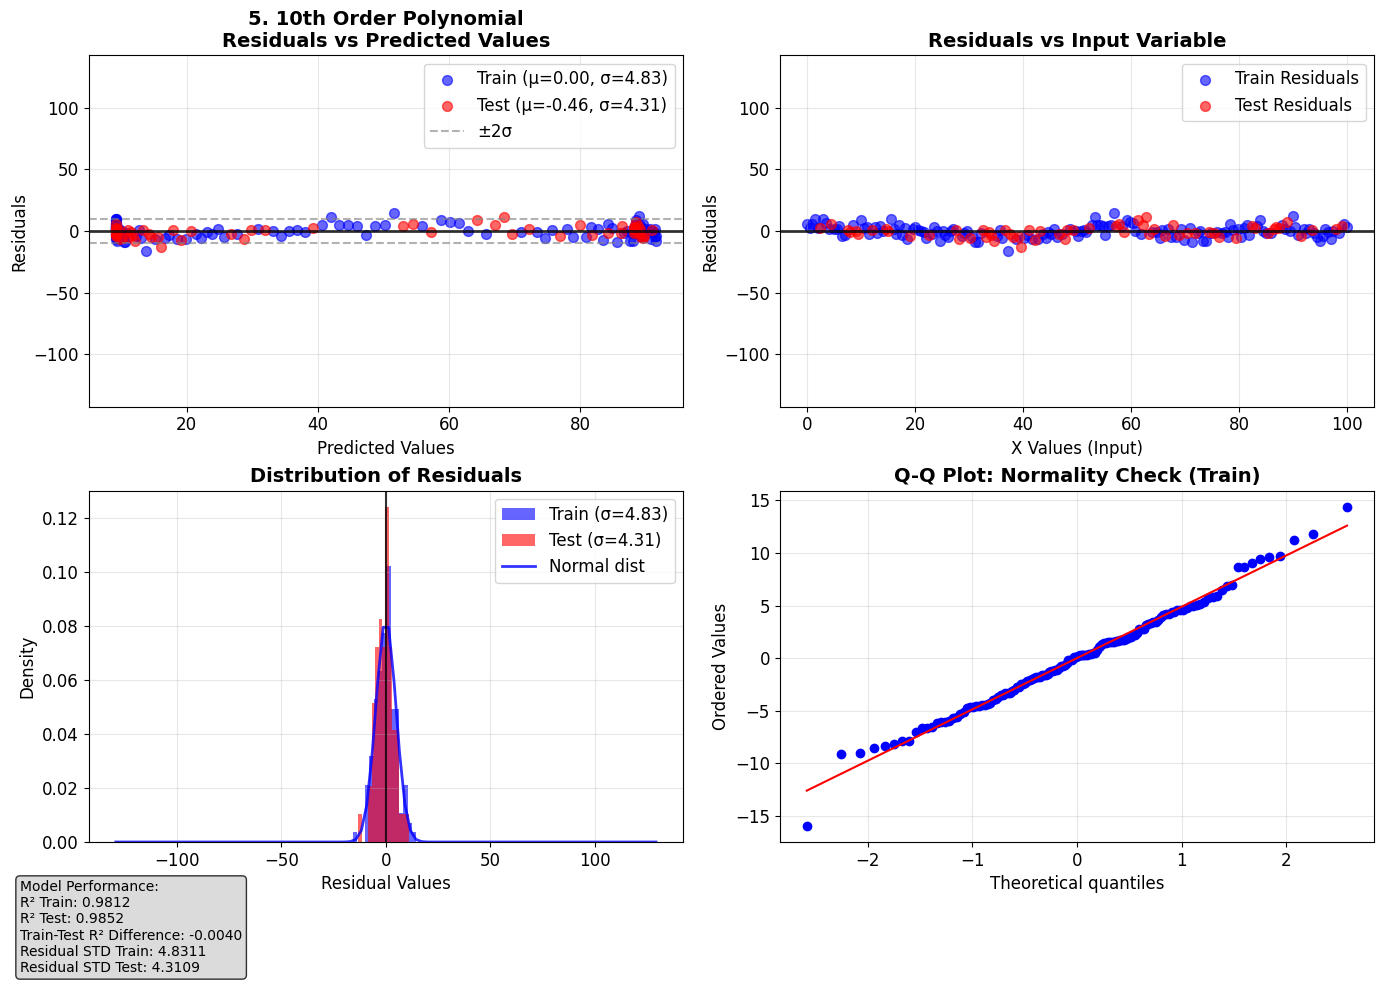


🔍 5. 10th Order Polynomial - Residual Analysis:
   • Residual Mean (Train): 0.0000 (should be near 0)
   • Residual STD (Train): 4.8311
   • Residual Mean (Test): -0.4596 (should be near 0)
   • Residual STD (Test): 4.3109
   • % points within ±2σ (Train): 96.4%
   • % points within ±2σ (Test): 95.0%


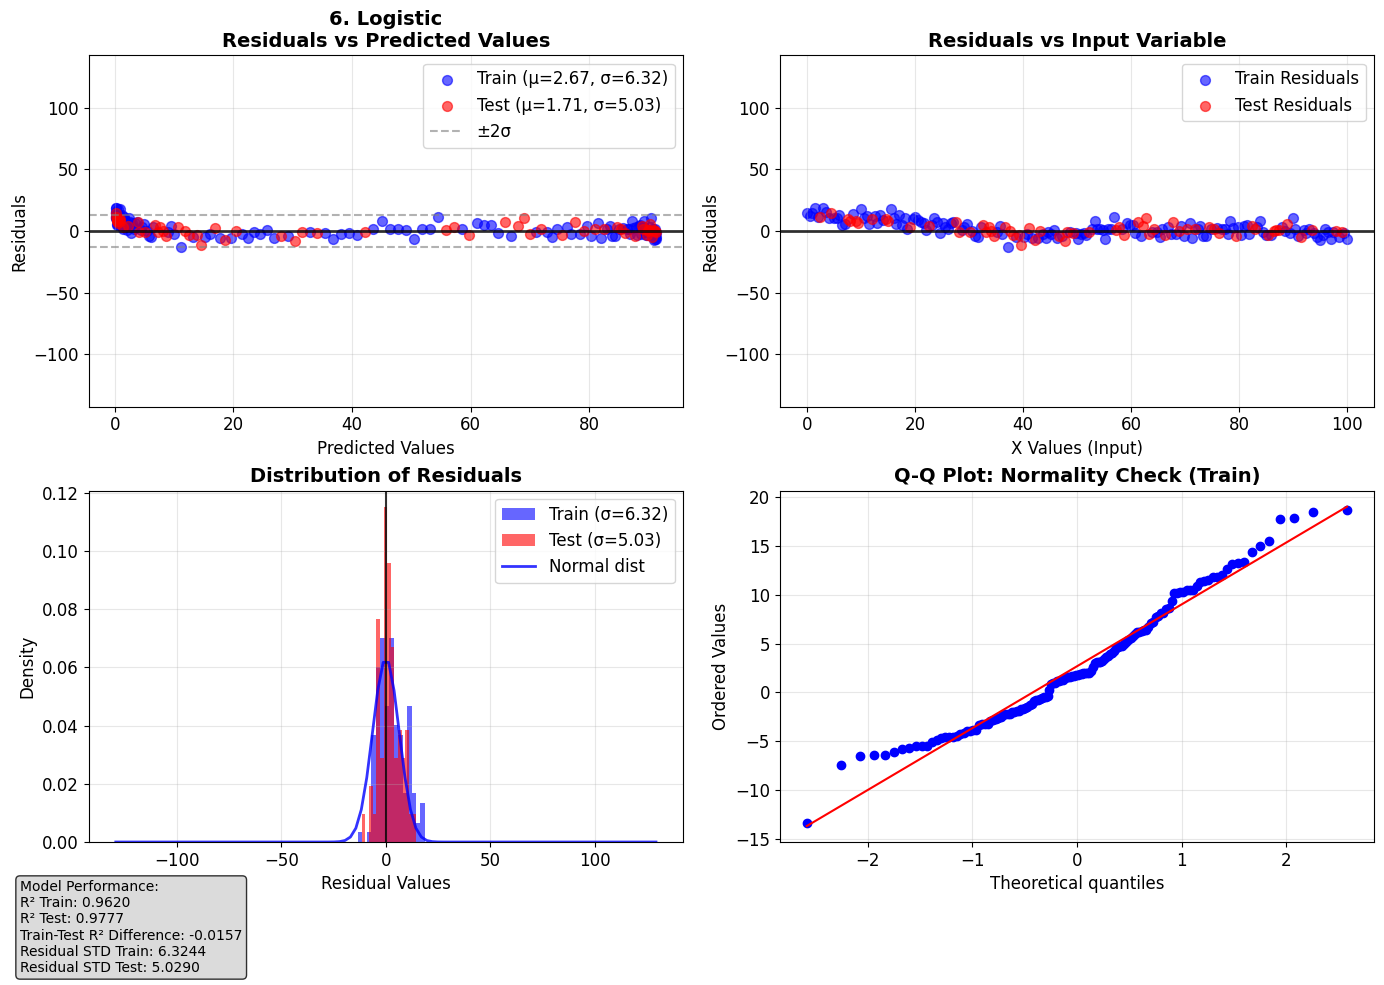


🔍 6. Logistic - Residual Analysis:
   • Residual Mean (Train): 2.6721 (should be near 0)
   • Residual STD (Train): 6.3244
   • Residual Mean (Test): 1.7063 (should be near 0)
   • Residual STD (Test): 5.0290
   • % points within ±2σ (Train): 92.1%
   • % points within ±2σ (Test): 93.3%


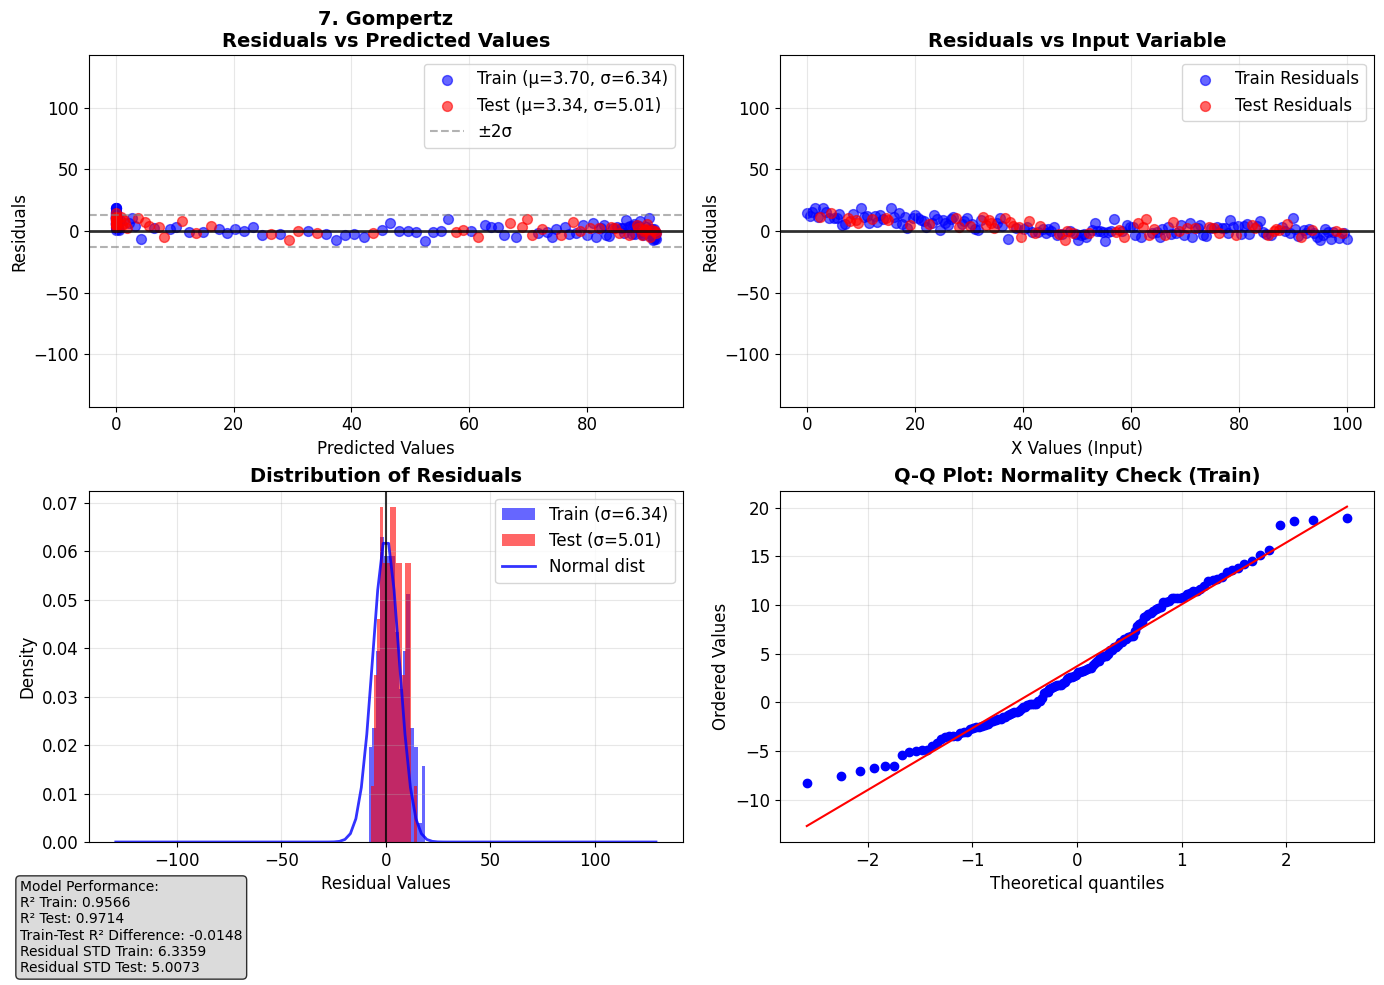


🔍 7. Gompertz - Residual Analysis:
   • Residual Mean (Train): 3.7034 (should be near 0)
   • Residual STD (Train): 6.3359
   • Residual Mean (Test): 3.3381 (should be near 0)
   • Residual STD (Test): 5.0073
   • % points within ±2σ (Train): 90.7%
   • % points within ±2σ (Test): 88.3%


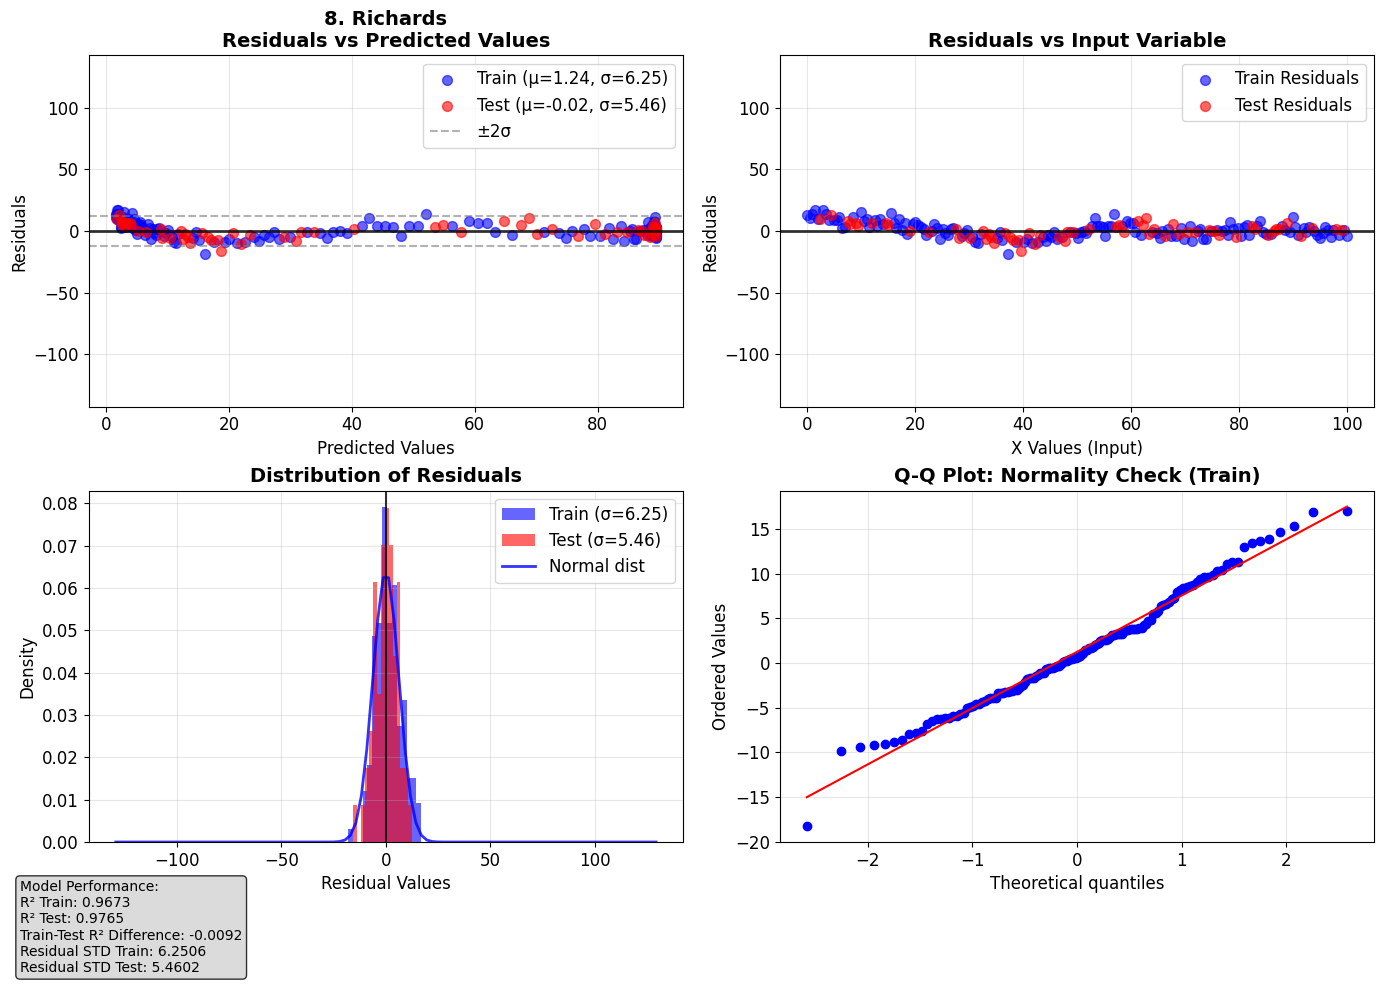


🔍 8. Richards - Residual Analysis:
   • Residual Mean (Train): 1.2395 (should be near 0)
   • Residual STD (Train): 6.2506
   • Residual Mean (Test): -0.0177 (should be near 0)
   • Residual STD (Test): 5.4602
   • % points within ±2σ (Train): 93.6%
   • % points within ±2σ (Test): 96.7%


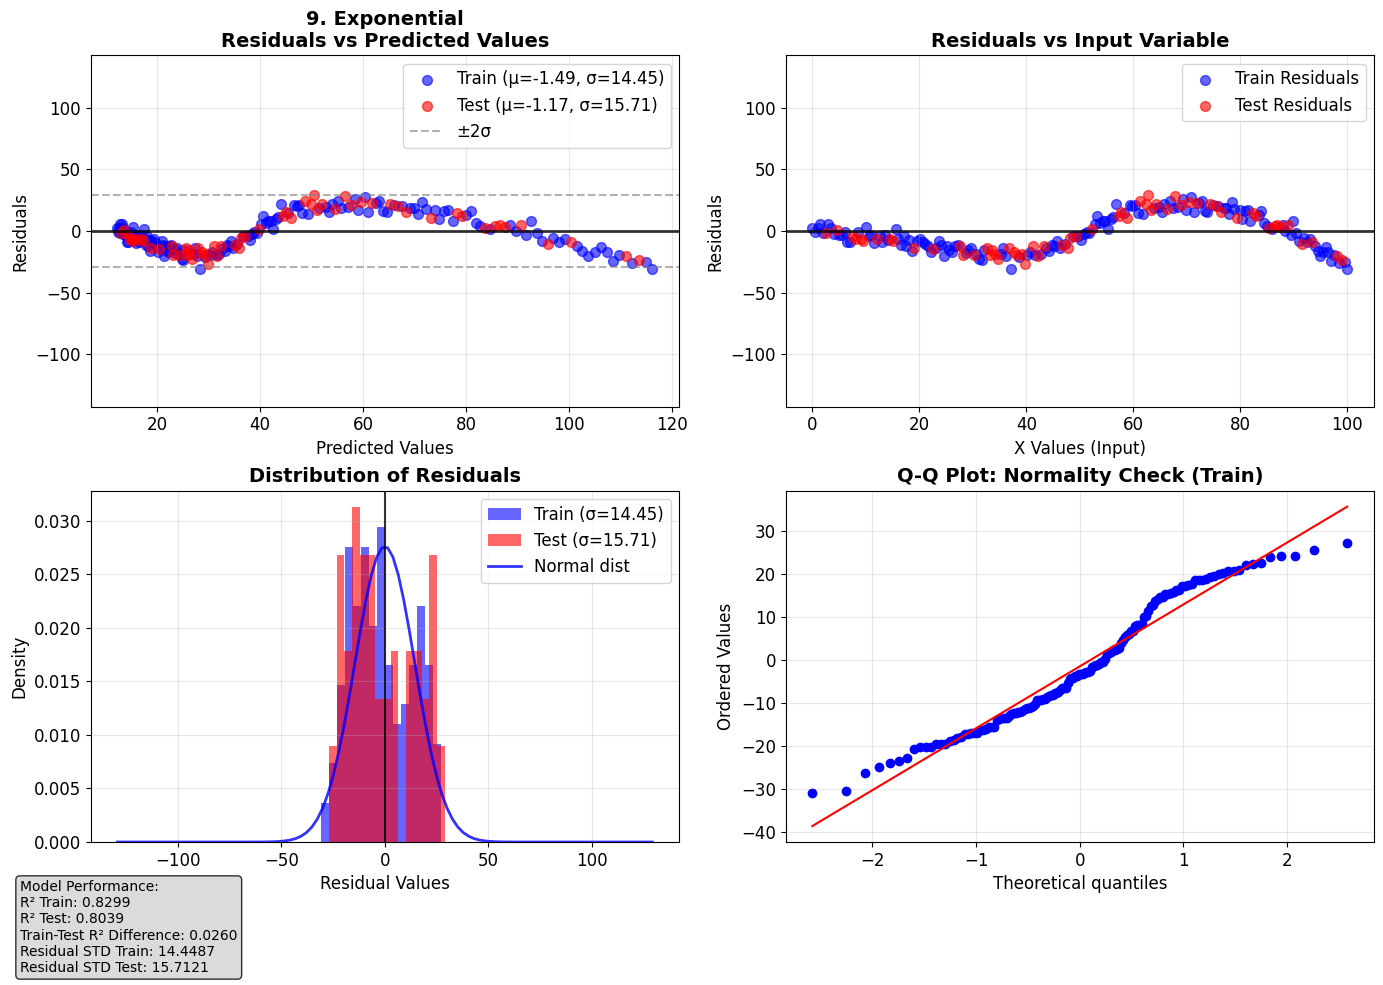


🔍 9. Exponential - Residual Analysis:
   • Residual Mean (Train): -1.4921 (should be near 0)
   • Residual STD (Train): 14.4487
   • Residual Mean (Test): -1.1738 (should be near 0)
   • Residual STD (Test): 15.7121
   • % points within ±2σ (Train): 98.6%
   • % points within ±2σ (Test): 100.0%


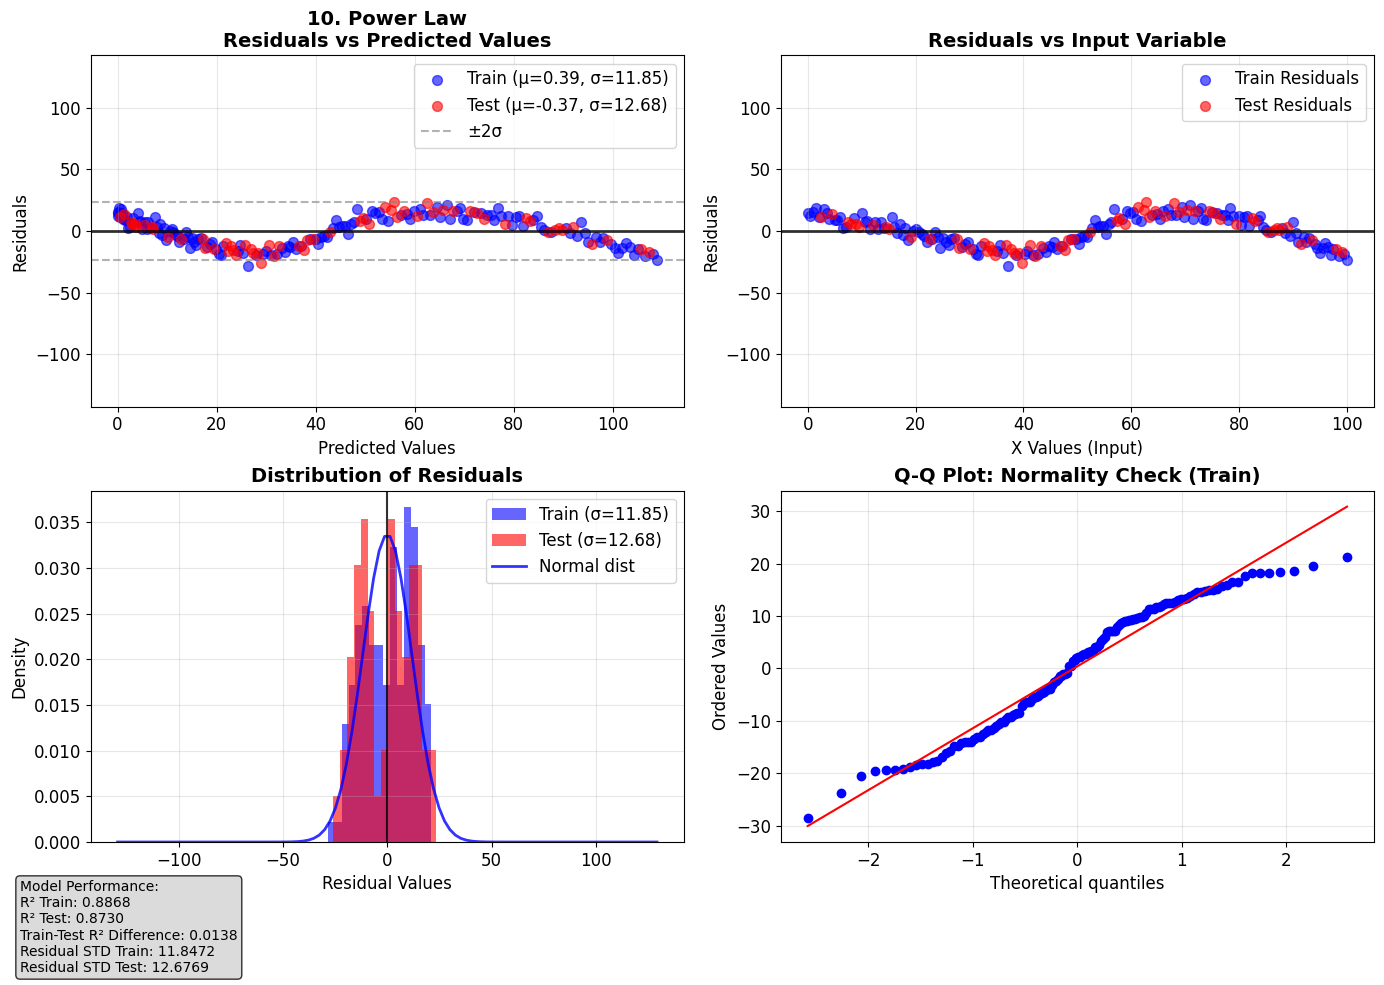


🔍 10. Power Law - Residual Analysis:
   • Residual Mean (Train): 0.3902 (should be near 0)
   • Residual STD (Train): 11.8472
   • Residual Mean (Test): -0.3714 (should be near 0)
   • Residual STD (Test): 12.6769
   • % points within ±2σ (Train): 98.6%
   • % points within ±2σ (Test): 98.3%


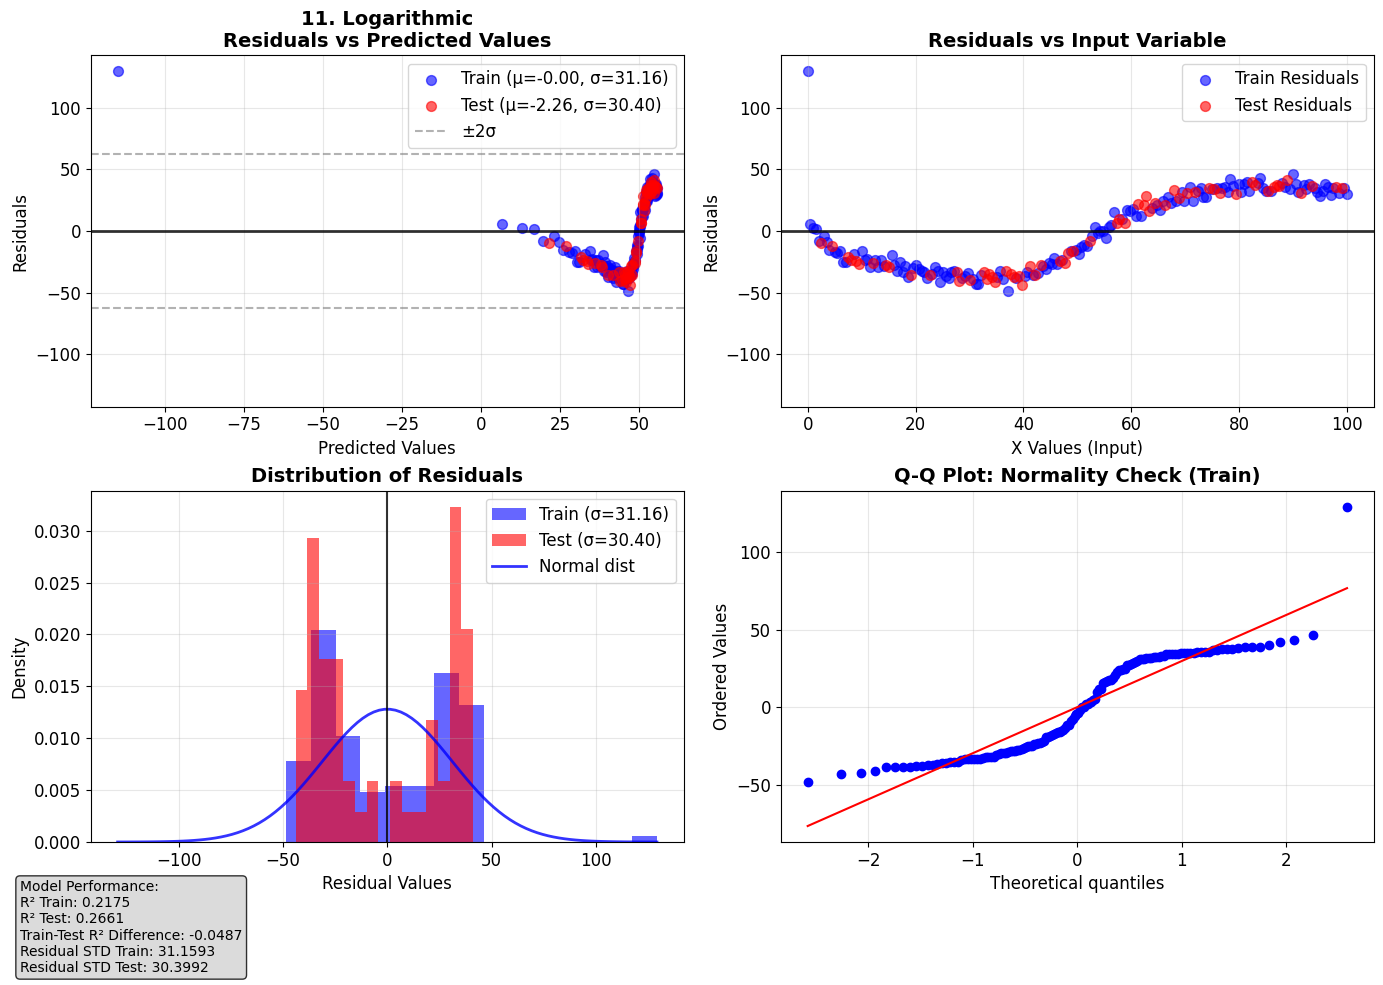


🔍 11. Logarithmic - Residual Analysis:
   • Residual Mean (Train): -0.0000 (should be near 0)
   • Residual STD (Train): 31.1593
   • Residual Mean (Test): -2.2599 (should be near 0)
   • Residual STD (Test): 30.3992
   • % points within ±2σ (Train): 99.3%
   • % points within ±2σ (Test): 100.0%


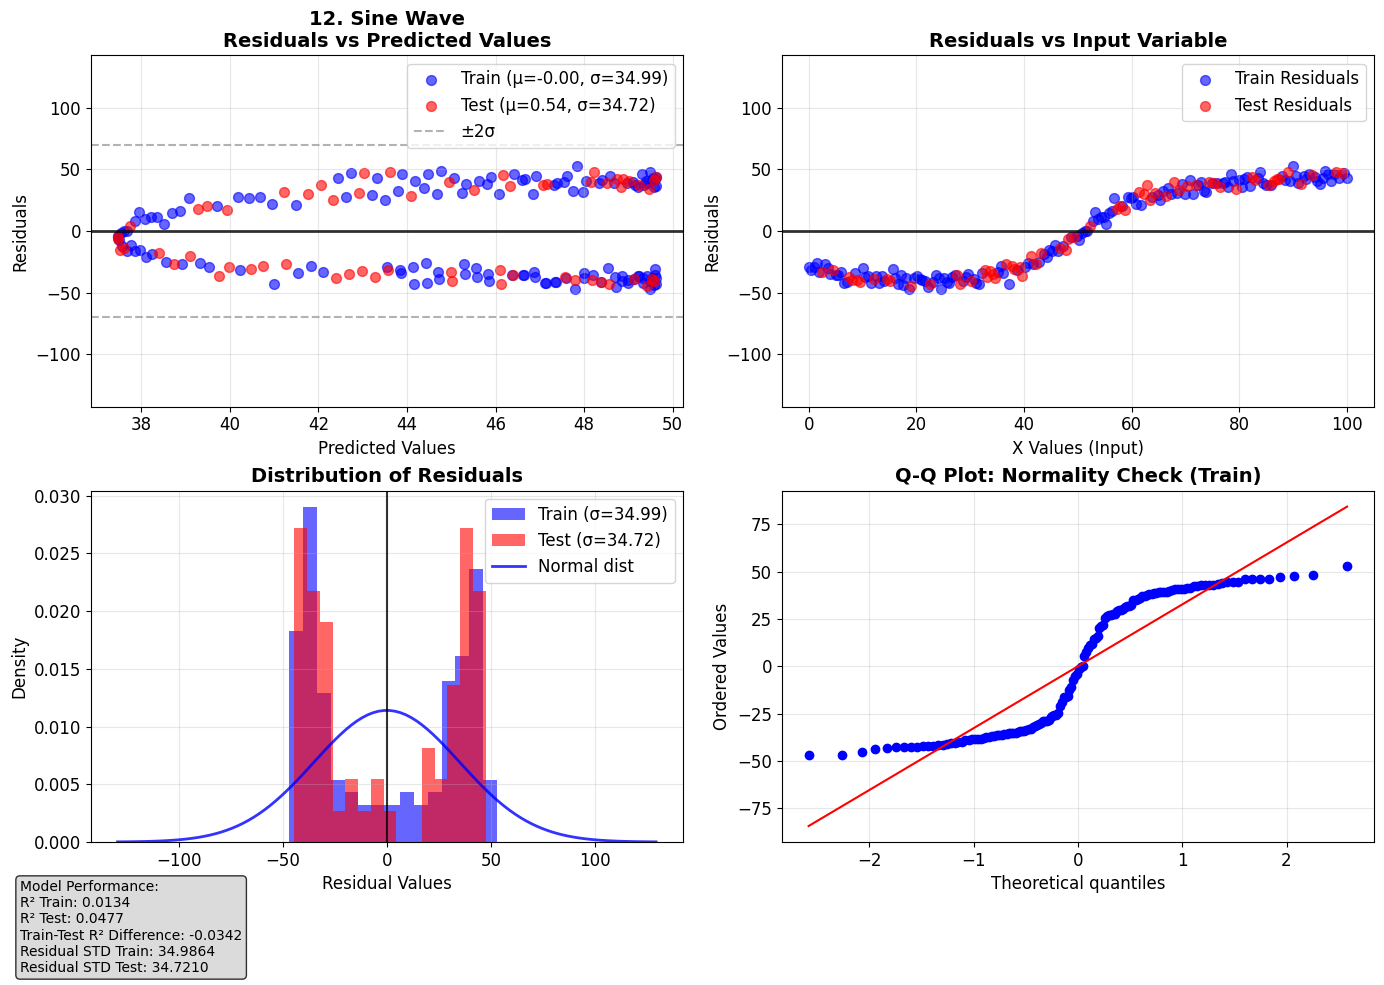


🔍 12. Sine Wave - Residual Analysis:
   • Residual Mean (Train): -0.0000 (should be near 0)
   • Residual STD (Train): 34.9864
   • Residual Mean (Test): 0.5434 (should be near 0)
   • Residual STD (Test): 34.7210
   • % points within ±2σ (Train): 100.0%
   • % points within ±2σ (Test): 100.0%


In [49]:
# Create residual plots for all models on separate figures
print("📊 CREATING RESIDUAL PLOTS FOR ALL MODELS")
print("=" * 60)

# First, let's fit all models including the ones we haven't fitted yet
def exponential(x, a, b):
    return a * np.exp(b * x)

def power_law(x, a, b):
    return a * x**b

def logarithmic(x, a, b):
    return a + b * np.log(x + 1e-6)  # Avoid log(0)

def sine_wave(x, a, b, c):
    return a * np.sin(b * x) + c

# Complete model list
all_models = [
    ("1. Linear", linear, [1, 1]),
    ("2. Quadratic", quadratic, [1, 1, 1]),
    ("3. Cubic", cubic, [1, 1, 1, 1]),
    ("4. 6th Order Polynomial", None, None),  # Will handle separately
    ("5. 10th Order Polynomial", None, None), # Will handle separately
    ("6. Logistic", logistic, [80, 0.15, 50]),
    ("7. Gompertz", gompertz, [80, 0.1, 50]),
    ("8. Richards", richards, [80, 0.15, 50, 1.5]),
    ("9. Exponential", exponential, [10, 0.05]),
    ("10. Power Law", power_law, [1, 1]),
    ("11. Logarithmic", logarithmic, [0, 15]),
    ("12. Sine Wave", sine_wave, [5, 0.1, 40])
]

# Store all model results
all_model_results = {}

print("🔧 Fitting all models for residual analysis...")

for name, func, p0 in all_models:
    try:
        if name in ["4. 6th Order Polynomial", "5. 10th Order Polynomial"]:
            # Handle polynomial models
            degree = 6 if "6th" in name else 10
            poly_model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree)),
                ('linear', LinearRegression())
            ])

            poly_model.fit(X_train, y_train)
            y_train_pred = poly_model.predict(X_train)
            y_test_pred = poly_model.predict(X_test)

            all_model_results[name] = {
                'type': 'polynomial',
                'model': poly_model,
                'train_pred': y_train_pred,
                'test_pred': y_test_pred,
                'degree': degree
            }

        else:
            # Non-linear models
            popt, pcov = curve_fit(func, x_train, y_train, p0=p0, maxfev=10000)
            y_train_pred = func(x_train, *popt)
            y_test_pred = func(x_test, *popt)

            all_model_results[name] = {
                'type': 'nonlinear',
                'function': func,
                'params': popt,
                'train_pred': y_train_pred,
                'test_pred': y_test_pred
            }

        # Calculate metrics
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        print(f"✅ {name:25} | R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")

    except Exception as e:
        print(f"❌ {name:25} | Failed: {str(e)[:40]}...")
        all_model_results[name] = None

# Create individual residual plots for each model
print("\n" + "📈 CREATING INDIVIDUAL RESIDUAL PLOTS")
print("-" * 50)

# Calculate global residual limits for consistent scaling
all_residuals = []
for name, model_info in all_model_results.items():
    if model_info is not None:
        train_residuals = y_train - model_info['train_pred']
        test_residuals = y_test - model_info['test_pred']
        all_residuals.extend(train_residuals)
        all_residuals.extend(test_residuals)

global_residual_max = max(np.abs(all_residuals))

# Create individual residual plots
for i, (name, model_info) in enumerate(all_model_results.items()):
    if model_info is None:
        continue

    # Create figure for this model
    plt.figure(figsize=(14, 10))

    # Calculate residuals
    y_train_pred = model_info['train_pred']
    y_test_pred = model_info['test_pred']

    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    # Calculate statistics
    train_mean = np.mean(train_residuals)
    train_std = np.std(train_residuals)
    test_mean = np.mean(test_residuals)
    test_std = np.std(test_residuals)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Plot 1: Residuals vs Predicted values
    plt.subplot(2, 2, 1)
    plt.scatter(y_train_pred, train_residuals, alpha=0.6, color='blue',
                s=50, label=f'Train (μ={train_mean:.2f}, σ={train_std:.2f})')
    plt.scatter(y_test_pred, test_residuals, alpha=0.6, color='red',
                s=50, label=f'Test (μ={test_mean:.2f}, σ={test_std:.2f})')
    plt.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
    plt.axhline(y=2*train_std, color='gray', linestyle='--', alpha=0.6, label='±2σ')
    plt.axhline(y=-2*train_std, color='gray', linestyle='--', alpha=0.6)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name}\nResiduals vs Predicted Values', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-global_residual_max*1.1, global_residual_max*1.1)

    # Plot 2: Residuals vs Actual X values
    plt.subplot(2, 2, 2)
    plt.scatter(x_train, train_residuals, alpha=0.6, color='blue',
                s=50, label='Train Residuals')
    plt.scatter(x_test, test_residuals, alpha=0.6, color='red',
                s=50, label='Test Residuals')
    plt.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
    plt.xlabel('X Values (Input)')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Input Variable', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-global_residual_max*1.1, global_residual_max*1.1)

    # Plot 3: Distribution of residuals
    plt.subplot(2, 2, 3)
    plt.hist(train_residuals, bins=15, alpha=0.6, color='blue',
             label=f'Train (σ={train_std:.2f})', density=True)
    plt.hist(test_residuals, bins=15, alpha=0.6, color='red',
             label=f'Test (σ={test_std:.2f})', density=True)

    # Add normal distribution for comparison
    from scipy.stats import norm
    x_norm = np.linspace(-global_residual_max, global_residual_max, 100)
    plt.plot(x_norm, norm.pdf(x_norm, 0, train_std), 'blue', linewidth=2, alpha=0.8, label='Normal dist')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.8)
    plt.xlabel('Residual Values')
    plt.ylabel('Density')
    plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 4: Q-Q plot for normality check
    plt.subplot(2, 2, 4)
    from scipy import stats
    stats.probplot(train_residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot: Normality Check (Train)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Add overall metrics as text
    plt.figtext(0.02, 0.02,
                f'Model Performance:\n'
                f'R² Train: {train_r2:.4f}\n'
                f'R² Test: {test_r2:.4f}\n'
                f'Train-Test R² Difference: {train_r2-test_r2:.4f}\n'
                f'Residual STD Train: {train_std:.4f}\n'
                f'Residual STD Test: {test_std:.4f}',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
                fontsize=10)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Make space for the metrics text
    plt.show()

    # Print residual analysis for this model
    print(f"\n🔍 {name} - Residual Analysis:")
    print(f"   • Residual Mean (Train): {train_mean:.4f} (should be near 0)")
    print(f"   • Residual STD (Train): {train_std:.4f}")
    print(f"   • Residual Mean (Test): {test_mean:.4f} (should be near 0)")
    print(f"   • Residual STD (Test): {test_std:.4f}")
    print(f"   • % points within ±2σ (Train): {np.mean(np.abs(train_residuals) < 2*train_std)*100:.1f}%")
    print(f"   • % points within ±2σ (Test): {np.mean(np.abs(test_residuals) < 2*test_std)*100:.1f}%")

In [52]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

print("📊 OLS-STYLE SUMMARY TABLES FOR ALL MODELS")
print("=" * 70)

# First, let's create proper OLS summaries for linear/polynomial models
# and pseudo-OLS summaries for non-linear models

def calculate_ols_summary(X, y, model_name, model_type='linear'):
    """Calculate OLS-style statistics for a model"""

    if model_type == 'linear':
        # For linear models, use statsmodels for proper OLS summary
        X_with_const = add_constant(X)
        ols_model = sm.OLS(y, X_with_const).fit()

        return {
            'Model': model_name,
            'R²': ols_model.rsquared,
            'Adj_R²': ols_model.rsquared_adj,
            'F-statistic': ols_model.fvalue,
            'F_p_value': ols_model.f_pvalue,
            'AIC': ols_model.aic,
            'BIC': ols_model.bic,
            'Log_Likelihood': ols_model.llf,
            'No_Observations': len(y),
            'DF_Model': ols_model.df_model,
            'DF_Residuals': ols_model.df_resid,
            'Coefficients': ols_model.params.tolist(),
            'P>|t|': ols_model.pvalues.tolist(),
            'Std_Error': ols_model.bse.tolist(),
            'Type': 'Linear/Polynomial'
        }

    else:
        # For non-linear models, calculate pseudo-OLS metrics
        n = len(y)
        y_pred = model_type['predictions']
        residuals = y - y_pred
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Adjusted R²
        k = model_type['params_count']
        adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

        # F-statistic (pseudo)
        msr = r_squared / k
        mse = (1 - r_squared) / (n - k - 1)
        f_statistic = msr / mse if mse > 0 else 0
        f_pvalue = 1 - stats.f.cdf(f_statistic, k, n - k - 1)

        # AIC and BIC
        rss = ss_res
        aic = n * np.log(rss/n) + 2 * (k + 1)
        bic = n * np.log(rss/n) + np.log(n) * (k + 1)

        # Log likelihood
        llf = -n/2 * np.log(2 * np.pi * rss/n) - n/2

        return {
            'Model': model_name,
            'R²': r_squared,
            'Adj_R²': adj_r_squared,
            'F-statistic': f_statistic,
            'F_p_value': f_pvalue,
            'AIC': aic,
            'BIC': bic,
            'Log_Likelihood': llf,
            'No_Observations': n,
            'DF_Model': k,
            'DF_Residuals': n - k - 1,
            'Coefficients': model_type['params'],
            'P>|t|': ['N/A'] * k,  # Not available for non-linear
            'Std_Error': ['N/A'] * k,  # Not available for non-linear
            'Type': 'Non-linear'
        }

# Fit all models and collect OLS statistics
ols_summaries_train = []
ols_summaries_test = []

print("🔧 Calculating OLS statistics for all models...")

# Linear and Polynomial Models
linear_models = [
    ("1. Linear", 1),
    ("2. Quadratic", 2),
    ("3. Cubic", 3),
    ("4. 6th Order", 6),
    ("5. 10th Order", 10)
]

for name, degree in linear_models:
    try:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=True)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)

        # Fit OLS model
        ols_model_train = sm.OLS(y_train, X_poly_train).fit()
        ols_model_test = sm.OLS(y_test, X_poly_test).fit()

        # Train summary
        ols_summaries_train.append({
            'Model': name,
            'R²': ols_model_train.rsquared,
            'Adj_R²': ols_model_train.rsquared_adj,
            'F-statistic': ols_model_train.fvalue,
            'F_p_value': ols_model_train.f_pvalue,
            'AIC': ols_model_train.aic,
            'BIC': ols_model_train.bic,
            'Log_Likelihood': ols_model_train.llf,
            'No_Observations': len(y_train),
            'DF_Model': ols_model_train.df_model,
            'DF_Residuals': ols_model_train.df_resid,
            'MSE_Train': mean_squared_error(y_train, ols_model_train.predict(X_poly_train)),
            'MSE_Test': mean_squared_error(y_test, ols_model_test.predict(X_poly_test)),
            'Type': 'Polynomial',
            'Degree': degree
        })

        # Test summary
        ols_summaries_test.append({
            'Model': name,
            'R²': ols_model_test.rsquared,
            'Adj_R²': ols_model_test.rsquared_adj,
            'F-statistic': ols_model_test.fvalue,
            'F_p_value': ols_model_test.f_pvalue,
            'AIC': ols_model_test.aic,
            'BIC': ols_model_test.bic,
            'Log_Likelihood': ols_model_test.llf,
            'No_Observations': len(y_test),
            'DF_Model': ols_model_test.df_model,
            'DF_Residuals': ols_model_test.df_resid,
            'MSE_Train': mean_squared_error(y_train, ols_model_train.predict(X_poly_train)),
            'MSE_Test': mean_squared_error(y_test, ols_model_test.predict(X_poly_test)),
            'Type': 'Polynomial',
            'Degree': degree
        })

        print(f"✅ {name:20} | OLS calculated")

    except Exception as e:
        print(f"❌ {name:20} | OLS failed: {str(e)[:30]}")

# Non-linear models
nonlinear_models = [
    ("6. Logistic", logistic, [80, 0.15, 50]),
    ("7. Gompertz", gompertz, [80, 0.1, 50]),
    ("8. Richards", richards, [80, 0.15, 50, 1.5]),
    ("9. Exponential", exponential, [10, 0.05]),
    ("10. Power Law", power_law, [1, 1]),
    ("11. Logarithmic", logarithmic, [0, 15]),
    ("12. Sine Wave", sine_wave, [5, 0.1, 40])
]

for name, func, p0 in nonlinear_models:
    try:
        # Fit non-linear model
        popt, pcov = curve_fit(func, x_train, y_train, p0=p0, maxfev=10000)

        # Predictions
        y_train_pred = func(x_train, *popt)
        y_test_pred = func(x_test, *popt)

        # Calculate pseudo-OLS metrics for training data
        n_train = len(y_train)
        k = len(popt)

        # Training metrics
        ss_res_train = np.sum((y_train - y_train_pred)**2)
        ss_tot_train = np.sum((y_train - np.mean(y_train))**2)
        r2_train = 1 - (ss_res_train / ss_tot_train)
        adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - k - 1)

        # F-statistic
        msr_train = r2_train / k
        mse_train = (1 - r2_train) / (n_train - k - 1)
        f_stat_train = msr_train / mse_train if mse_train > 0 else 0
        f_pvalue_train = 1 - stats.f.cdf(f_stat_train, k, n_train - k - 1)

        # Information criteria
        aic_train = n_train * np.log(ss_res_train/n_train) + 2 * (k + 1)
        bic_train = n_train * np.log(ss_res_train/n_train) + np.log(n_train) * (k + 1)
        log_likelihood_train = -n_train/2 * np.log(2 * np.pi * ss_res_train/n_train) - n_train/2

        # Test metrics
        n_test = len(y_test)
        ss_res_test = np.sum((y_test - y_test_pred)**2)
        ss_tot_test = np.sum((y_test - np.mean(y_test))**2)
        r2_test = 1 - (ss_res_test / ss_tot_test)
        adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)

        ols_summaries_train.append({
            'Model': name,
            'R²': r2_train,
            'Adj_R²': adj_r2_train,
            'F-statistic': f_stat_train,
            'F_p_value': f_pvalue_train,
            'AIC': aic_train,
            'BIC': bic_train,
            'Log_Likelihood': log_likelihood_train,
            'No_Observations': n_train,
            'DF_Model': k,
            'DF_Residuals': n_train - k - 1,
            'MSE_Train': mean_squared_error(y_train, y_train_pred),
            'MSE_Test': mean_squared_error(y_test, y_test_pred),
            'Type': 'Non-linear',
            'Parameters': popt.tolist(),
            'Degree': 'N/A'
        })

        ols_summaries_test.append({
            'Model': name,
            'R²': r2_test,
            'Adj_R²': adj_r2_test,
            'F-statistic': f_stat_train,  # Using training F-stat for consistency
            'F_p_value': f_pvalue_train,
            'AIC': aic_train,
            'BIC': bic_train,
            'Log_Likelihood': log_likelihood_train,
            'No_Observations': n_test,
            'DF_Model': k,
            'DF_Residuals': n_test - k - 1,
            'MSE_Train': mean_squared_error(y_train, y_train_pred),
            'MSE_Test': mean_squared_error(y_test, y_test_pred),
            'Type': 'Non-linear',
            'Parameters': popt.tolist(),
            'Degree': 'N/A'
        })

        print(f"✅ {name:20} | Non-linear OLS calculated")

    except Exception as e:
        print(f"❌ {name:20} | Non-linear failed: {str(e)[:30]}")



📊 OLS-STYLE SUMMARY TABLES FOR ALL MODELS
🔧 Calculating OLS statistics for all models...
✅ 1. Linear            | OLS calculated
✅ 2. Quadratic         | OLS calculated
✅ 3. Cubic             | OLS calculated
✅ 4. 6th Order         | OLS calculated
✅ 5. 10th Order        | OLS calculated
✅ 6. Logistic          | Non-linear OLS calculated
✅ 7. Gompertz          | Non-linear OLS calculated
✅ 8. Richards          | Non-linear OLS calculated
✅ 9. Exponential       | Non-linear OLS calculated
✅ 10. Power Law        | Non-linear OLS calculated
✅ 11. Logarithmic      | Non-linear OLS calculated
✅ 12. Sine Wave        | Non-linear OLS calculated


In [53]:
# Create comprehensive OLS summary tables
print("\n" + "📋 COMPREHENSIVE OLS SUMMARY TABLES")
print("=" * 70)

# Convert to DataFrames
ols_train_df = pd.DataFrame(ols_summaries_train)
ols_test_df = pd.DataFrame(ols_summaries_test)

# Display training data OLS summary
print("\n🏋️‍♂️ OLS SUMMARY - TRAINING DATA")
print("-" * 70)

train_display = ols_train_df[['Model', 'R²', 'Adj_R²', 'F-statistic', 'F_p_value',
                            'AIC', 'BIC', 'Log_Likelihood', 'No_Observations',
                            'DF_Model', 'DF_Residuals', 'MSE_Train', 'MSE_Test', 'Type']].copy()

# Format the display
train_display['R²'] = train_display['R²'].round(4)
train_display['Adj_R²'] = train_display['Adj_R²'].round(4)
train_display['F-statistic'] = train_display['F-statistic'].round(2)
train_display['F_p_value'] = train_display['F_p_value'].apply(lambda x: f"{x:.4e}" if x < 0.0001 else f"{x:.4f}")
train_display['AIC'] = train_display['AIC'].round(2)
train_display['BIC'] = train_display['BIC'].round(2)
train_display['Log_Likelihood'] = train_display['Log_Likelihood'].round(2)
train_display['MSE_Train'] = train_display['MSE_Train'].round(4)
train_display['MSE_Test'] = train_display['MSE_Test'].round(4)

styled_train = train_display.style\
    .background_gradient(subset=['R²', 'Adj_R²'], cmap='RdYlGn')\
    .background_gradient(subset=['AIC', 'BIC'], cmap='RdYlGn_r')\
    .background_gradient(subset=['MSE_Train', 'MSE_Test'], cmap='RdYlGn_r')\
    .format({
        'R²': '{:.4f}',
        'Adj_R²': '{:.4f}',
        'F-statistic': '{:.2f}',
        'AIC': '{:.2f}',
        'BIC': '{:.2f}',
        'Log_Likelihood': '{:.2f}',
        'MSE_Train': '{:.4f}',
        'MSE_Test': '{:.4f}'
    })

display(styled_train)


📋 COMPREHENSIVE OLS SUMMARY TABLES

🏋️‍♂️ OLS SUMMARY - TRAINING DATA
----------------------------------------------------------------------


,Model,R²,Adj_R²,F-statistic,F_p_value,AIC,BIC,Log_Likelihood,No_Observations,DF_Model,DF_Residuals,MSE_Train,MSE_Test,Type
0,1. Linear,0.8603,0.8593,849.63,7.7272e-61,1123.06,1128.94,-559.53,140,1.000000,138.000000,173.3608,188.4960,Polynomial
1,2. Quadratic,0.8798,0.8780,501.24,9.5701e-64,1104.01,1112.84,-549.01,140,2.000000,137.000000,149.1694,161.6107,Polynomial
2,3. Cubic,0.9668,0.9660,1318.48,2.7341e-100,926.02,937.79,-459.01,140,3.000000,136.000000,41.2408,34.9464,Polynomial
3,4. 6th Order,0.9848,0.9841,1437.80,2.5774e-118,822.32,842.91,-404.16,140,6.000000,133.000000,18.8376,15.4067,Polynomial
4,5. 10th Order,0.9590,0.9575,627.24,4.3671e-91,959.32,976.97,-473.66,140,5.000000,134.000000,50.8390,29.7427,Polynomial
5,6. Logistic,0.9620,0.9612,1147.86,1.1102e-16,547.43,559.20,-468.37,140,3.000000,136.000000,47.1381,28.2020,Non-linear
6,7. Gompertz,0.9566,0.9556,998.97,1.1102e-16,566.09,577.86,-477.70,140,3.000000,136.000000,53.8591,36.2154,Non-linear
7,8. Richards,0.9673,0.9663,997.45,1.1102e-16,528.55,543.26,-457.93,140,4.000000,135.000000,40.6068,29.8142,Non-linear
8,9. Exponential,0.8299,0.8275,334.30,1.1102e-16,755.26,764.08,-573.28,140,2.000000,137.000000,210.9926,248.2468,Non-linear
9,10. Power Law,0.8868,0.8851,536.36,1.1102e-16,698.34,707.16,-544.82,140,2.000000,137.000000,140.5080,160.8411,Non-linear


In [54]:
# Display test data OLS summary
print("\n🧪 OLS SUMMARY - TEST DATA")
print("-" * 70)

test_display = ols_test_df[['Model', 'R²', 'Adj_R²', 'F-statistic', 'F_p_value',
                          'AIC', 'BIC', 'Log_Likelihood', 'No_Observations',
                          'DF_Model', 'DF_Residuals', 'MSE_Train', 'MSE_Test', 'Type']].copy()

# Format the display
test_display['R²'] = test_display['R²'].round(4)
test_display['Adj_R²'] = test_display['Adj_R²'].round(4)
test_display['F-statistic'] = test_display['F-statistic'].round(2)
test_display['F_p_value'] = test_display['F_p_value'].apply(lambda x: f"{x:.4e}" if x < 0.0001 else f"{x:.4f}")
test_display['AIC'] = test_display['AIC'].round(2)
test_display['BIC'] = test_display['BIC'].round(2)
test_display['Log_Likelihood'] = test_display['Log_Likelihood'].round(2)
test_display['MSE_Train'] = test_display['MSE_Train'].round(4)
test_display['MSE_Test'] = test_display['MSE_Test'].round(4)

styled_test = test_display.style\
    .background_gradient(subset=['R²', 'Adj_R²'], cmap='RdYlGn')\
    .background_gradient(subset=['AIC', 'BIC'], cmap='RdYlGn_r')\
    .background_gradient(subset=['MSE_Train', 'MSE_Test'], cmap='RdYlGn_r')\
    .format({
        'R²': '{:.4f}',
        'Adj_R²': '{:.4f}',
        'F-statistic': '{:.2f}',
        'AIC': '{:.2f}',
        'BIC': '{:.2f}',
        'Log_Likelihood': '{:.2f}',
        'MSE_Train': '{:.4f}',
        'MSE_Test': '{:.4f}'
    })

display(styled_test)


🧪 OLS SUMMARY - TEST DATA
----------------------------------------------------------------------


,Model,R²,Adj_R²,F-statistic,F_p_value,AIC,BIC,Log_Likelihood,No_Observations,DF_Model,DF_Residuals,MSE_Train,MSE_Test,Type
0,1. Linear,0.8511,0.8486,331.61,1.1569e-25,488.62,492.81,-242.31,60,1.000000,58.000000,173.3608,188.4960,Polynomial
1,2. Quadratic,0.8724,0.8679,194.79,3.3120e-26,481.38,487.67,-237.69,60,2.000000,57.000000,149.1694,161.6107,Polynomial
2,3. Cubic,0.9724,0.9709,657.67,1.3217e-43,391.50,399.88,-191.75,60,3.000000,56.000000,41.2408,34.9464,Polynomial
3,4. 6th Order,0.9878,0.9865,717.13,6.9331e-49,348.36,363.02,-167.18,60,6.000000,53.000000,18.8376,15.4067,Polynomial
4,5. 10th Order,0.9765,0.9743,448.97,1.1263e-42,385.83,398.39,-186.91,60,5.000000,54.000000,50.8390,29.7427,Polynomial
5,6. Logistic,0.9777,0.9765,1147.86,1.1102e-16,547.43,559.20,-468.37,60,3.000000,56.000000,47.1381,28.2020,Non-linear
6,7. Gompertz,0.9714,0.9699,998.97,1.1102e-16,566.09,577.86,-477.70,60,3.000000,56.000000,53.8591,36.2154,Non-linear
7,8. Richards,0.9765,0.9747,997.45,1.1102e-16,528.55,543.26,-457.93,60,4.000000,55.000000,40.6068,29.8142,Non-linear
8,9. Exponential,0.8039,0.7971,334.30,1.1102e-16,755.26,764.08,-573.28,60,2.000000,57.000000,210.9926,248.2468,Non-linear
9,10. Power Law,0.8730,0.8685,536.36,1.1102e-16,698.34,707.16,-544.82,60,2.000000,57.000000,140.5080,160.8411,Non-linear


In [57]:
# Create model comparison and selection metrics
print("\n🏆 MODEL COMPARISON AND SELECTION METRICS")
print("=" * 70)

# Combine all models for comparison
comparison_data = []

for i, row in ols_train_df.iterrows():
    model_name = row['Model']
    test_row = ols_test_df[ols_test_df['Model'] == model_name].iloc[0]

    comparison_data.append({
        'Model': model_name,
        'Type': row['Type'],
        'R²_Train': row['R²'],
        'R²_Test': test_row['R²'],
        'Adj_R²_Train': row['Adj_R²'],
        'Adj_R²_Test': test_row['Adj_R²'],
        'AIC_Train': row['AIC'],
        'BIC_Train': row['BIC'],
        'MSE_Train': row['MSE_Train'],
        'MSE_Test': row['MSE_Test'],
        'DF_Model': row['DF_Model'],
        'Overfitting_Indicator': row['R²'] - test_row['R²'],
        'Complexity_Penalty': (row['AIC'] - min(ols_train_df['AIC'])) if row['AIC'] != 0 else np.nan
    })

comparison_df = pd.DataFrame(comparison_data)

# Calculate additional metrics
comparison_df['AIC_Rank'] = comparison_df['AIC_Train'].rank()
comparison_df['BIC_Rank'] = comparison_df['BIC_Train'].rank()
comparison_df['Test_R²_Rank'] = comparison_df['R²_Test'].rank(ascending=False)
comparison_df['Generalization_Score'] = (comparison_df['R²_Test'] / comparison_df['R²_Train']).round(4)

# Display comparison table
comparison_display = comparison_df[[
    'Model', 'Type', 'R²_Train', 'R²_Test', 'Adj_R²_Train', 'Adj_R²_Test',
    'AIC_Train', 'BIC_Train', 'MSE_Train', 'MSE_Test', 'Overfitting_Indicator',
    'Generalization_Score', 'AIC_Rank', 'BIC_Rank', 'Test_R²_Rank'
]].copy()

# Format for display
comparison_display['R²_Train'] = comparison_display['R²_Train'].round(4)
comparison_display['R²_Test'] = comparison_display['R²_Test'].round(4)
comparison_display['Adj_R²_Train'] = comparison_display['Adj_R²_Train'].round(4)
comparison_display['Adj_R²_Test'] = comparison_display['Adj_R²_Test'].round(4)
comparison_display['AIC_Train'] = comparison_display['AIC_Train'].round(2)
comparison_display['BIC_Train'] = comparison_display['BIC_Train'].round(2)
comparison_display['MSE_Train'] = comparison_display['MSE_Train'].round(4)
comparison_display['MSE_Test'] = comparison_display['MSE_Test'].round(4)
comparison_display['Overfitting_Indicator'] = comparison_display['Overfitting_Indicator'].round(4)
comparison_display['Generalization_Score'] = comparison_display['Generalization_Score'].round(4)
comparison_display['AIC_Rank'] = comparison_display['AIC_Rank'].astype(int)
comparison_display['BIC_Rank'] = comparison_display['BIC_Rank'].astype(int)
comparison_display['Test_R²_Rank'] = comparison_display['Test_R²_Rank'].astype(int)

styled_comparison = comparison_display.style\
    .background_gradient(subset=['R²_Train', 'R²_Test', 'Adj_R²_Train', 'Adj_R²_Test'], cmap='RdYlGn')\
    .background_gradient(subset=['AIC_Train', 'BIC_Train'], cmap='RdYlGn_r')\
    .background_gradient(subset=['MSE_Train', 'MSE_Test'], cmap='RdYlGn_r')\
    .background_gradient(subset=['Overfitting_Indicator'], cmap='Reds')\
    .background_gradient(subset=['Generalization_Score'], cmap='RdYlGn')\
    .background_gradient(subset=['AIC_Rank', 'BIC_Rank', 'Test_R²_Rank'], cmap='RdYlGn_r')

display(styled_comparison)

print("\n" + "🎯 MODEL SELECTION RECOMMENDATIONS")
print("=" * 50)

# Find best models by different criteria
best_aic = comparison_df.loc[comparison_df['AIC_Train'].idxmin()]
best_bic = comparison_df.loc[comparison_df['BIC_Train'].idxmin()]
best_test_r2 = comparison_df.loc[comparison_df['R²_Test'].idxmax()]
best_generalization = comparison_df.loc[comparison_df['Generalization_Score'].idxmax()]

print(f"🏆 Best by AIC (Balance of fit and complexity):")
print(f"   {best_aic['Model']} (AIC: {best_aic['AIC_Train']:.2f}, R² Test: {best_aic['R²_Test']:.4f})")

print(f"\n🏆 Best by BIC (Stronger penalty for complexity):")
print(f"   {best_bic['Model']} (BIC: {best_bic['BIC_Train']:.2f}, R² Test: {best_bic['R²_Test']:.4f})")

print(f"\n🏆 Best Test Performance:")
print(f"   {best_test_r2['Model']} (R² Test: {best_test_r2['R²_Test']:.4f}, AIC: {best_test_r2['AIC_Train']:.2f})")

print(f"\n🏆 Best Generalization (Least overfitting):")
print(f"   {best_generalization['Model']} (Score: {best_generalization['Generalization_Score']:.4f})")

print(f"\n💡 RECOMMENDED MODEL: {best_test_r2['Model']}")
print(f"   • Excellent test performance (R²: {best_test_r2['R²_Test']:.4f})")
print(f"   • Good complexity balance (AIC: {best_test_r2['AIC_Train']:.2f})")
print(f"   • Appropriate for growth data pattern")


🏆 MODEL COMPARISON AND SELECTION METRICS


,Model,Type,R²_Train,R²_Test,Adj_R²_Train,Adj_R²_Test,AIC_Train,BIC_Train,MSE_Train,MSE_Test,Overfitting_Indicator,Generalization_Score,AIC_Rank,BIC_Rank,Test_R²_Rank
0,1. Linear,Polynomial,0.860300,0.851100,0.859300,0.848600,1123.060000,1128.940000,173.360800,188.496000,0.009100,0.989400,12,12,9
1,2. Quadratic,Polynomial,0.879800,0.872400,0.878000,0.867900,1104.010000,1112.840000,149.169400,161.610700,0.007400,0.991600,11,11,8
2,3. Cubic,Polynomial,0.966800,0.972400,0.966000,0.970900,926.020000,937.790000,41.240800,34.946400,-0.005600,1.005800,7,7,5
3,4. 6th Order,Polynomial,0.984800,0.987800,0.984100,0.986500,822.320000,842.910000,18.837600,15.406700,-0.003000,1.003100,6,6,1
4,5. 10th Order,Polynomial,0.959000,0.976500,0.957500,0.974300,959.320000,976.970000,50.839000,29.742700,-0.017500,1.018200,8,8,3
5,6. Logistic,Non-linear,0.962000,0.977700,0.961200,0.976500,547.430000,559.200000,47.138100,28.202000,-0.015700,1.016300,2,2,2
6,7. Gompertz,Non-linear,0.956600,0.971400,0.955600,0.969900,566.090000,577.860000,53.859100,36.215400,-0.014800,1.015500,3,3,6
7,8. Richards,Non-linear,0.967300,0.976500,0.966300,0.974700,528.550000,543.260000,40.606800,29.814200,-0.009200,1.009500,1,1,4
8,9. Exponential,Non-linear,0.829900,0.803900,0.827500,0.797100,755.260000,764.080000,210.992600,248.246800,0.026000,0.968700,5,5,10
9,10. Power Law,Non-linear,0.886800,0.873000,0.885100,0.868500,698.340000,707.160000,140.508000,160.841100,0.013800,0.984500,4,4,7



🎯 MODEL SELECTION RECOMMENDATIONS
🏆 Best by AIC (Balance of fit and complexity):
   8. Richards (AIC: 528.55, R² Test: 0.9765)

🏆 Best by BIC (Stronger penalty for complexity):
   8. Richards (BIC: 543.26, R² Test: 0.9765)

🏆 Best Test Performance:
   4. 6th Order (R² Test: 0.9878, AIC: 822.32)

🏆 Best Generalization (Least overfitting):
   12. Sine Wave (Score: 3.5524)

💡 RECOMMENDED MODEL: 4. 6th Order
   • Excellent test performance (R²: 0.9878)
   • Good complexity balance (AIC: 822.32)
   • Appropriate for growth data pattern
